# Normative Factors and Psychiatric Diagnoses Influence on Postmortem Brain Tissue Volumes

## II. Background
Our understanding of severe mental illness has been greatly advanced through the study of the postmortem human brain tissue (Lewis DA, *Neuropsychopharm.*, 2002; McCullumsmith, *Neuropsychopharm.* 2013). Studies of the postmortem human brain provide insight into the molecular and structural abnormalities which are thought to be the neural substrate for symptoms in these patient populations. Postmortem brain tissue samples are becoming widely recognized as providing ample opportunity to investigate these brain diseases, and a great deal of resources from the National Institute of Mental Health is going towards studies of the postmortem human brain.  

Postmortem studies of human brain provide an important bridge linking animal studies to neuroimaging and other *in vivo* approaches. One example of this link between animal studies and *in vivo* neuroimaging studies is reporting of brain volume abnomralities. There is a significant body of literature to implicate nearly every psychiatric illness with abnormalities in brain tissue volume as reported by structural MRI data, including major depressive disorder (Koolschijin PC et al., *Hum Brain Mapp.* 2009), bipolar disorder (Kempton MJ et al., *Arch Gen Psychiatry.* 2008), schizophrenia (Steen et al., *Br J Psychiatry.*, 2006; Boos et al., *Arch Gen Psychiatry.* 2007), and alcohol use disorder (Bae et al., *Exp Neurobiol.*, 2016). 

The large number of studies that report significant associations of psychiatric diagnosis with brain volume changes could reflect the true association of major mental illness with brain volume abnormalities. However, these findings might also be influenced by a variety of antemortem factors. For example, antipsychotic use has been associated with brain volume loss in monkeys chronically exposed to typical and atypical antipsychotics (Dorph-Petersen et al., *Neuropsychopharm.*, 2005). Moreover, it is widely recognized that the neuroimaging data exhibits a reporting bias in the literature (Ioannidis, *Arch Gen Psychiatry.* 2011). Thus, the abnormalities in brain tissue volume could reflect true biological differences, may be a consequence of other comorbid factors influencing brain tissue volume, or could be a product of excessive reporting bias in the literature.

Understanding how antemortem factors, such as psychiatric diagnosis, drug use, and age, together with other postmortem factors important for brain banking, influence brain tissue volume is of relevance for both clinical and basic scientists. Therefore, the present study sought to characterize the antemortem and postmortem factors influencing brain tissue volume using an existing cohort of highly characterized brain tissue specimens. Our objective was to identify which antemortem and postmortem factors influenced brain tissue volume measured at the time of tissue recovery. Our subject groups included control subjects (CTL) and those diagnosed with alcohol use disorder subjects (ETOH), major depressive disorder (MDD), bipolar disorder (BP), and schizophrenia (SCZ).

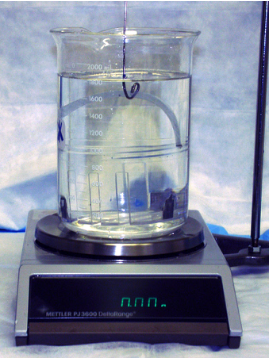

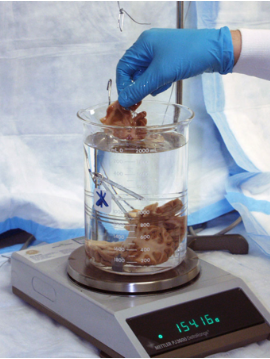

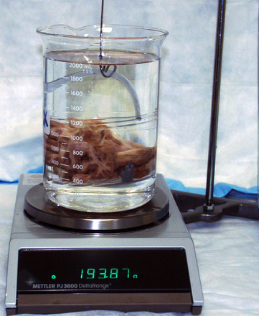

In [1]:
library(gridExtra)
library(brm)
library(lme4)
library(ggthemes)
library(leaps)
library(glmnet)
library(plot3D)
library(ggfortify)
library(mediation)
library(tidyverse)
library(arm)
library(ggbeeswarm)
library(forcats)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  2.0.1     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand

Loading required package: foreach

Attaching package: ‘foreach’

The following objects are masked from ‘package:purrr’:

    accumulate, when

Loaded glmnet 2.0-16

Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: mvtnorm
Loading required package: sandwich
mediation: Causal Mediation A

In [73]:
install.packages("ggbeeswarm")
library(ggbeeswarm)


The downloaded binary packages are in
	/var/folders/3d/xmp0cm0j5kvbh5pgrr2b6scw0000gn/T//RtmpPXnLGN/downloaded_packages


In [98]:
install.packages("forcats")

also installing the dependency ‘ellipsis’




The downloaded binary packages are in
	/var/folders/3d/xmp0cm0j5kvbh5pgrr2b6scw0000gn/T//RtmpPXnLGN/downloaded_packages


In [99]:
library(forcats)

In [526]:
options(repr.matrix.max.rows = 200, repr.matrix.max.columns = 50)

## III. Variables
The main variables of interest are diagnostic category (CTL, ETOH, MDD, BP, and SCZ). 

Antemortem biological variables that will be accounted for include sex (M/F), ethnicity, age, duration of illness (in years), cause of death category (natural, accidental drug/alcohol death, traumatic deaths, neurologic-related deaths), suicide, tobacco use at time of death (Y/N), antidepressant use at time of death (Y/N), antipsychotic use at time of death, benzodiazepine use at time of death (Y/N). 

Quantitative variables that will be accounted for include height, weight, BMI, age (years), and duration of illness (years), post-mortem interval (time between death and tissue recovery). 

Random variables that will be accounted for include date of measurement taken and experimenter.

Number of observations:
Control = 186
ETOH = 148
MDD = 168
BP = 26
SCZ = 41

## IV. Hypotheses
##### The specific hypothesis that I am interested in is to test the prediction that left hemisphere brain volume will be significantly lower than control subjects for the schizophrenia and alcohol-use disorder variable groups, and the deficit observed in schizophrenia subjects is true regardless of a comorbid alcohol use disorder.

We predict that left hemisphere brain tissue volume (our dependent continuous variable $y$) will be significantly different in the SCZ and ETOH groups, but not the MDD and BP groups, from control subjects. We will be using linear regression (rather than classifier models), as volume output is a quantitative continuous variable. This basic 

$y_{volume}$  
$x_{diagnosis}$  
$x_{antipsychotics}$  
$x_{age}$  
$x_{sex}$  
$x_{ETOH}$ or a comorbid alcohol use disorder diagnosis .  


  
The form of the hypothesis that we want to test is as follows: after accounting for the variation in brain volume due to sex and age, how much of the variability in the data is explained by psychiatric diagnosis? Which diagnoses are significantly different than control subjects? In other words:

$ Y_{volume} = \beta_0 + \beta_{diagnosis}x_{diagnosis} + + \beta_{sex}x_{sex} + + \beta_{age}x_{age} + + \beta_{antipsychotics}x_{antipsychotics}+  \beta_{diagnosis*age}x_{diagnosis*age} + \beta_{diagnosis*sex}x_{diagnosis*sex} + \beta_{diagnosis*antipsychotics}x_{diagnosis*antipsychotics} + \beta_{diagnosis*age*antipsychotics}x_{diagnosis*age*antipsychotics} + \epsilon $

## V. Data Organization

The data are organized as a data frame, with the subject identifier in the first column and a number of descriptors.  

The data are drawn from an Access Database and we have *a priori* determined which subjects we want to use. Specifically, we only started collecting brain volumes after subject number HU 1274, so we only want to include values with something higher than HU 1274. The data from Access are exported into an Excel sheet, which will be saved as a .csv and imported into R.

Key data cleansing steps include:
* Indicating the subject identifier as the row names
* In the areas that are blank, filling in "NA" so that there are no missed rows
* Many of the diagnoses in the dataframe are listed as DSM-IV codes that will be challenging to interpret. Thus, I will transform these columns into Yes/No binary options and organize into the following groups:
    + Alcohol Use Disorder
    + Mood Symptoms (important for schizophrenia subjects to differentiate between schizoaffective and schizophrenia)
    + 
    


### i. Data Cleansing

First, will need to indicate the human subject number as row names, fill in "NA" so that there are no missed rows.

Key anomalies to detect include when the total brain volume and total left cerebrum volumes are the same value. There is no circumstance under which this could be the case, so need to remove these anomalies.



In [2]:
#volumetable <- read.csv("Volume_R.csv", header=TRUE, row.names = "HU_NUM", na.strings=c("","NA"))
volumetable <- read.csv("Volume_R.csv", header=TRUE, na.strings=c("","NA"))

In [3]:
summary(volumetable$GROUP)

BP CONTROL    ETOH     MDD  SCHIZO 
     26     186     148     168      41

In [4]:
volumetable <- volumetable %>% 
rename("fresh_cerebrum_volume" = "Fresh_LeftCerebrum_Tissue_Volume",
       "fresh_total_volume" = "Fresh_Total_Tissue_Volume",
       "frozen_total_volume" = "Frozen_Total_Tissue_Volume",
       "frozen_cerebrum_volume" = "Frozen_LeftCerebrum_Tissue_Volume",
       "Diagnosis" = "GROUP",
       "race" = "RIDENT"
      )

In [5]:
volumetable

Diagnosis HU_NUM sex age  
1   CONTROL   1274   1   73.08
2   CONTROL   1276   2   57.61
3   CONTROL   1278   1   50.22
4   CONTROL   1280   2   50.72
5   CONTROL   1282   2   39.75
6   CONTROL   1284   1   55.71
7   ETOH      1286   1   47.23
8   ETOH      1288   1   59.03
9   MDD       1289   2   46.18
10  CONTROL   1290   1   46.04
11  MDD       1292   1   67.82
12  CONTROL   1293   2   65.88
13  SCHIZO    1296   1   48.10
14  CONTROL   1298   1   48.74
15  ETOH      1299   2   46.26
16  CONTROL   1300   2   56.40
17  MDD       1302   2   42.54
18  CONTROL   1304   1   62.93
19  MDD       1305   2   46.29
20  CONTROL   1306   1   18.03
21  CONTROL   1307   1   32.94
22  ETOH      1308   1   58.20
23  MDD       1312   1   51.24
24  MDD       1313   1   36.79
25  SCHIZO    1314   1   50.38
26  MDD       1315   2   28.92
27  CONTROL   1317   1   56.43
28  CONTROL   1318   1   58.50
29  ETOH      1319   1   55.42
30  MDD       1320   1   55.91
⋮   ⋮         ⋮      ⋮   ⋮    
540 CONTROL   13312  2   50.80
541 CONTROL   13313  2   55.33
542 BP        13315  1   66.10
543 MDD       13322  1   56.40
544 CONTROL   13323  2   24.17
545 MDD       13326  1   52.15
546 SCHIZO    13329  2   70.93
547 CONTROL   13330  2   41.81
548 CONTROL   13333  1   40.38
549 ETOH      13334  2   25.43
550 SCHIZO    13339  1   57.40
551 MDD       13340  2   54.01
552 MDD       13347  2   55.01
553 CONTROL   13350  1   45.82
554 CONTROL   13353  1   47.08
555 MDD       13360  2   24.51
556 CONTROL   13361  2   51.56
557 MDD       13364  1   25.81
558 MDD       13366  1   69.55
559 BP        13367  1   38.35
560 MDD       13369  1   59.44
561 MDD       13370  1   44.43
562 CONTROL   13376  1   70.42
563 MDD       13377  1   42.25
564 MDD       13379  1   21.73
565 MDD       13388  2   73.51
566 CONTROL   13394  2   65.28
567 ETOH      13395  1   41.63
568 CONTROL   13400  1   42.40
569 CONTROL   13405  1   42.51
    medslist_atod                                                                                                                                               
1   CARDIZEM, CARDURA, COLCHICINE, PEPCID                                                                                                                       
2   HUMULIN, LIPITOR                                                                                                                                            
3   NA                                                                                                                                                          
4   NA                                                                                                                                                          
5   NA                                                                                                                                                          
6   NA                                                                                                                                                          
7   NA                                                                                                                                                          
8   NONE                                                                                                                                                        
9   UNKNOWN                                                                                                                                                     
10  No MEDS entered                                                                                                                                             
11  NA                                                                                                                                                          
12  NA                                                                                                                                                

In [6]:
volumetable <- mutate(volumetable, sex = ifelse(grepl("1", sex), "Male",
                                                ifelse(grepl("2", sex), "Female",
                                                    "NA")))
volumetable <- mutate(volumetable, race = ifelse(grepl("C", race), "African American",
                                                ifelse(grepl("E", race), "Caucasian",
                                                      "Other")))

In [7]:
summary.factor(volumetable$race)
summary.factor(volumetable$sex)
volumetable

African American        Caucasian            Other 
              88              477                4

Female   Male 
   156    413

Diagnosis HU_NUM sex    age  
1   CONTROL   1274   Male   73.08
2   CONTROL   1276   Female 57.61
3   CONTROL   1278   Male   50.22
4   CONTROL   1280   Female 50.72
5   CONTROL   1282   Female 39.75
6   CONTROL   1284   Male   55.71
7   ETOH      1286   Male   47.23
8   ETOH      1288   Male   59.03
9   MDD       1289   Female 46.18
10  CONTROL   1290   Male   46.04
11  MDD       1292   Male   67.82
12  CONTROL   1293   Female 65.88
13  SCHIZO    1296   Male   48.10
14  CONTROL   1298   Male   48.74
15  ETOH      1299   Female 46.26
16  CONTROL   1300   Female 56.40
17  MDD       1302   Female 42.54
18  CONTROL   1304   Male   62.93
19  MDD       1305   Female 46.29
20  CONTROL   1306   Male   18.03
21  CONTROL   1307   Male   32.94
22  ETOH      1308   Male   58.20
23  MDD       1312   Male   51.24
24  MDD       1313   Male   36.79
25  SCHIZO    1314   Male   50.38
26  MDD       1315   Female 28.92
27  CONTROL   1317   Male   56.43
28  CONTROL   1318   Male   58.50
29  ETOH      1319   Male   55.42
30  MDD       1320   Male   55.91
⋮   ⋮         ⋮      ⋮      ⋮    
540 CONTROL   13312  Female 50.80
541 CONTROL   13313  Female 55.33
542 BP        13315  Male   66.10
543 MDD       13322  Male   56.40
544 CONTROL   13323  Female 24.17
545 MDD       13326  Male   52.15
546 SCHIZO    13329  Female 70.93
547 CONTROL   13330  Female 41.81
548 CONTROL   13333  Male   40.38
549 ETOH      13334  Female 25.43
550 SCHIZO    13339  Male   57.40
551 MDD       13340  Female 54.01
552 MDD       13347  Female 55.01
553 CONTROL   13350  Male   45.82
554 CONTROL   13353  Male   47.08
555 MDD       13360  Female 24.51
556 CONTROL   13361  Female 51.56
557 MDD       13364  Male   25.81
558 MDD       13366  Male   69.55
559 BP        13367  Male   38.35
560 MDD       13369  Male   59.44
561 MDD       13370  Male   44.43
562 CONTROL   13376  Male   70.42
563 MDD       13377  Male   42.25
564 MDD       13379  Male   21.73
565 MDD       13388  Female 73.51
566 CONTROL   13394  Female 65.28
567 ETOH      13395  Male   41.63
568 CONTROL   13400  Male   42.40
569 CONTROL   13405  Male   42.51
    medslist_atod                                                                                                                                               
1   CARDIZEM, CARDURA, COLCHICINE, PEPCID                                                                                                                       
2   HUMULIN, LIPITOR                                                                                                                                            
3   NA                                                                                                                                                          
4   NA                                                                                                                                                          
5   NA                                                                                                                                                          
6   NA                                                                                                                                                          
7   NA                                                                                                                                                          
8   NONE                                                                                                                                                        
9   UNKNOWN                                                                                                                                                     
10  No MEDS entered                                                                                                                                             
11  NA                                                                                                                       

In [8]:
#volumetable1 <- volumetable %>% rownames_to_column('HU_NUM')

In [347]:
#this step filters out any rows of HU subjects which did not have volume data.
volumetable1 <- volumetable %>%
filter(fresh_total_volume != " NA")
summary(volumetable1$Diagnosis) #confirm the filtering worked as expected

#Another way to do this
#sum(is.na(volumetable1$fresh_total_volume)) #returns the number of values missing for fresh_total_volume
#volumetable2 = na.omit(volumetable1$fresh_total_volume) # <-need to confirm this works later.

BP CONTROL    ETOH     MDD  SCHIZO 
     26     184     147     168      41

In [10]:
#showing my work, but this method doesn't work because it eliminates too many rows
#summary(volumetable1$ETOH) #tells me which diagnostic codes are present in the ETOH column. DSM-V codes are as follows
#305.00 Mild Alcohol Use Disorder
#303.90 Moderate-Severe Alcohol Use Disorder
#ignore 303.00 (only 1 subject; ICD-10 code lists as Alcohol Intoxication.
#volume2 <- volumetable1 %>% mutate(ETOHcode = NA)
#volume2$ETOHcode[str_detect(volume2$ETOH, "305.00")] <- "Mild"
#volume2$ETOHcode[str_detect(volume2$ETOH, "303.90")] <- "Moderate/Severe"
#volume2
#summary.factor(volume2$ETOHcode) #confirms that this matches the above and the coding procedure worked as expected.

In [348]:
#create a new datacolumn based on DSM-V codes from the ETOH. 
#use dlpyr mutate function. Must use grepl here because grepl searches for the presence of the string. 
#using ifelse alone leads to all 'NA's
volumetable2 <- mutate(volumetable1, ETOHcode = ifelse(grepl("FINAL_305.00", ETOH), "Mild",
                                      ifelse(grepl("FINAL_303.90|FINAL_303.00", ETOH), "Moderate/Severe",
                                  "NA")))

In [349]:
volumetable3 <- mutate(volumetable2, ETOHpres = ifelse(grepl("305.00|303.90", ETOH), "1",
                                      "0"))
volumetable3

#For other analyses, I will likely be interested in just whether or not there was a comorbid alcohol use disorder
#for this, I set up a column with dummy variables based on whether there was anything in the ETOH column

Diagnosis HU_NUM sex    age  
1   CONTROL   1274   Male   73.08
2   CONTROL   1276   Female 57.61
3   CONTROL   1278   Male   50.22
4   CONTROL   1280   Female 50.72
5   CONTROL   1282   Female 39.75
6   CONTROL   1284   Male   55.71
7   ETOH      1286   Male   47.23
8   ETOH      1288   Male   59.03
9   MDD       1289   Female 46.18
10  CONTROL   1290   Male   46.04
11  MDD       1292   Male   67.82
12  CONTROL   1293   Female 65.88
13  SCHIZO    1296   Male   48.10
14  CONTROL   1298   Male   48.74
15  ETOH      1299   Female 46.26
16  CONTROL   1300   Female 56.40
17  MDD       1302   Female 42.54
18  CONTROL   1304   Male   62.93
19  MDD       1305   Female 46.29
20  CONTROL   1306   Male   18.03
21  CONTROL   1307   Male   32.94
22  ETOH      1308   Male   58.20
23  MDD       1312   Male   51.24
24  MDD       1313   Male   36.79
25  SCHIZO    1314   Male   50.38
26  MDD       1315   Female 28.92
27  CONTROL   1317   Male   56.43
28  CONTROL   1318   Male   58.50
29  ETOH      1319   Male   55.42
30  MDD       1320   Male   55.91
31  CONTROL   1322   Male   62.82
32  CONTROL   1324   Male   43.72
33  ETOH      1325   Male   22.04
34  CONTROL   1326   Male   58.15
35  SCHIZO    1331   Male   61.43
36  MDD       1332   Female 46.26
37  CONTROL   1333   Male   46.06
38  CONTROL   1335   Male   18.45
39  CONTROL   1336   Male   65.12
40  MDD       1337   Male   55.65
41  MDD       1338   Male   40.16
42  MDD       1339   Male   25.98
43  MDD       1340   Male   25.55
44  SCHIZO    1341   Female 44.51
45  ETOH      1342   Female 39.22
46  ETOH      1343   Male   56.99
47  ETOH      1344   Male   61.80
48  ETOH      1345   Male   58.84
49  ETOH      1346   Male   53.96
50  MDD       1347   Male   51.55
⋮   ⋮         ⋮      ⋮      ⋮    
517 MDD       13263  Male   53.04
518 ETOH      13265  Male   28.25
519 CONTROL   13266  Female 44.29
520 CONTROL   13267  Female 58.90
521 ETOH      13270  Male   53.63
522 ETOH      13273  Female 55.22
523 BP        13276  Female 53.85
524 CONTROL   13277  Male   51.48
525 ETOH      13280  Female 52.10
526 ETOH      13281  Female 54.84
527 MDD       13283  Female 53.32
528 MDD       13286  Female 28.64
529 CONTROL   13290  Male   56.18
530 CONTROL   13291  Male   37.57
531 CONTROL   13295  Male   49.42
532 CONTROL   13298  Male   50.54
533 MDD       13300  Male   47.76
534 CONTROL   13301  Male   17.47
535 CONTROL   13302  Male   46.71
536 BP        13306  Female 42.22
537 CONTROL   13312  Female 50.80
538 CONTROL   13313  Female 55.33
539 BP        13315  Male   66.10
540 MDD       13322  Male   56.40
541 CONTROL   13323  Female 24.17
542 MDD       13326  Male   52.15
543 SCHIZO    13329  Female 70.93
544 CONTROL   13330  Female 41.81
545 CONTROL   13333  Male   40.38
546 ETOH      13334  Female 25.43
547 SCHIZO    13339  Male   57.40
548 MDD       13340  Female 54.01
549 MDD       13347  Female 55.01
550 CONTROL   13350  Male   45.82
551 CONTROL   13353  Male   47.08
552 MDD       13360  Female 24.51
553 CONTROL   13361  Female 51.56
554 MDD       13364  Male   25.81
555 MDD       13366  Male   69.55
556 BP        13367  Male   38.35
557 MDD       13369  Male   59.44
558 MDD       13370  Male   44.43
559 CONTROL   13376  Male   70.42
560 MDD       13377  Male   42.25
561 MDD       13379  Male   21.73
562 MDD       13388  Female 73.51
563 CONTROL   13394  Female 65.28
564 ETOH      13395  Male   41.63
565 CONTROL   13400  Male   42.40
566 CONTROL   13405  Male   42.51
    medslist_atod                                                                                                                                               
1   CARDIZEM, CARDURA, COLCHICINE, PEPCID                                                                                                                       
2   HUMULIN, LIPITOR                                                                                                                                            
3   NA                                               

In [350]:
#last step is I'll want a binary indicator for schizophrenia vs schizoaffective. This info is contained within the
#DSM-V code under the SCHIZ category. Schizoaffective is coded as '295.70'. Thus, the summary below suggest 19/41
#subjects with schizophrenia were diagnosed with schizoaffective.
summary(volumetable3$SCHIZ)
volumetable4 <- mutate(volumetable3, Schizoaffective_Disorder = ifelse(grepl("295.70", SCHIZ), "1",
                                                                      "0"))
head(volumetable4)

FINAL_ FINAL_295.10 FINAL_295.30 FINAL_295.40 FINAL_295.70 FINAL_295.90 
           1            1           12            1           19            7 
        PRE_         NA's 
           7          518

Diagnosis HU_NUM sex    age   medslist_atod                         DSMIV
1 CONTROL   1274   Male   73.08 CARDIZEM, CARDURA, COLCHICINE, PEPCID NA   
2 CONTROL   1276   Female 57.61 HUMULIN, LIPITOR                      NA   
3 CONTROL   1278   Male   50.22 NA                                    NA   
4 CONTROL   1280   Female 50.72 NA                                    NA   
5 CONTROL   1282   Female 39.75 NA                                    NA   
6 CONTROL   1284   Male   55.71 NA                                    NA   
  AGEONSET DURATION REMISLEN COMMENT ⋯ Frozen_Date Frozen_Measurer Frozen_Time
1 NA       NA       NA       NA      ⋯ NA          NA              NA         
2 NA       NA       NA       NA      ⋯ NA          NA              NA         
3 NA       NA       NA       NA      ⋯ NA          NA              NA         
4 NA       NA       NA       NA      ⋯ 2005-05-05  ES              20         
5 NA       NA       NA       NA      ⋯ 2005-05-17  ES              24         
6 NA       NA       NA       NA      ⋯ 2005-05-27  ES              29         
  frozen_total_volume frozen_cerebrum_volume Total_VolumeChange
1    NA                  NA                          NA        
2    NA                  NA                          NA        
3    NA                  NA                          NA        
4 453.3               378.9                  -0.2566907        
5 435.8               371.9                  -0.2678931        
6 454.5               390.6                  -0.2852493        
  LeftCerebrum_VolumeChange ETOHcode ETOHpres Schizoaffective_Disorder
1         NA                NA       0        0                       
2         NA                NA       0        0                       
3         NA                NA       0        0                       
4 -0.2775553                NA       0        0                       
5 -0.2828158                NA       0        0                       
6 -0.2935070                NA       0        0

In [357]:
summary(volumetable4$Diagnosis)

BP CONTROL    ETOH     MDD  SCHIZO 
     26     184     147     168      41

One random factor that I will be interested in later is whether there is evidence of experimenter variability over time, given that there is a large time window during which these data were collected. Conveniently, this is indexed by the HU_NUM, as each human subject number is assigned as the specimen is collected. Therefore, in order to use this as a random factor, I will generate a table of HU_CODE and group them by 100's of subjects. 

In [429]:
#Need to create a categorical variable for HU_NUM to use it as a random effect.
#Random effects must be categorical variables, so the pseudocontinuous (integer based) HU_NUM won't work
#Using nested ifelse and mutate functions to create a new column titled "HU_NUM_GROUP"
volumetable5 <- mutate(volumetable4, HU_CODE = ifelse(HU_NUM %in% 1200:1299, "1200's",
                                ifelse(HU_NUM %in% 1300:1399, "1300's",
                                ifelse(HU_NUM %in% 1400:1499, "1400's",
                                ifelse(HU_NUM %in% 1500:1599, "1500's",
                                ifelse(HU_NUM %in% 1600:1699, "1600's",
                                ifelse(HU_NUM %in% 1700:1799, "1700's",
                                ifelse(HU_NUM %in% 1800:1899, "1800's",
                                ifelse(HU_NUM %in% 13000:13099, "13000's",
                                ifelse(HU_NUM %in% 13100:13199, "13100's",
                                ifelse(HU_NUM %in% 13200:13299, "13200's",
                                ifelse(HU_NUM %in% 13300:13405, "13300's",
                                NA)))))))))))) 
#rounded the last one; otherwise the final group would only have 2 subjects

Finally, for the sake of a tidy table, there are a lot of variables that I am not interested in using for the analysis at the present time. I will remove these variables to keep only the key variables of interest.

In [422]:
summary.factor(volumetable5$ETOH)

FINAL_ FINAL_303.00 FINAL_303.90 FINAL_305.00         PRE_   PRE_303.90 
           3            1          153          100           11            2 
  PRE_305.00         NA's 
           1          295

In [369]:
names(volumetable5)

[1] "Diagnosis"                 "HU_NUM"                   
 [3] "sex"                       "age"                      
 [5] "medslist_atod"             "DSMIV"                    
 [7] "AGEONSET"                  "DURATION"                 
 [9] "REMISLEN"                  "COMMENT"                  
[11] "MaxOfNEUROPATH"            "Positive"                 
[13] "race"                      "HEIGHT"                   
[15] "WEIGHT"                    "HANDED"                   
[17] "BWEIGHT"                   "CASEINFOCAUSE"            
[19] "CASEINFOMANNER"            "PMI"                      
[21] "DX_BASIS"                  "DIAGTIME"                 
[23] "DIAGCAT"                   "VOLUME_ALL_ALLCAUSE"      
[25] "VOLUME_ALL_ALLMANNER"      "AVAILCOMM"                
[27] "ADRC_CONTROL"              "ANX"                      
[29] "ANX."                      "CONTROL"                  
[31] "CONTROL."                  "CONTROL2"                 
[33] "DEMENTIA"                  "DEMENTIA."                
[35] "DRUG"                      "DRUG."                    
[37] "ETOH"                      "ETOH."                    
[39] "HD"                        "MOOD"                     
[41] "MOOD."                     "MR"                       
[43] "MR."                       "NEURO"                    
[45] "NEURO."                    "PD"                       
[47] "PSYCH"                     "PSYCH."                   
[49] "SCHIZ"                     "SCHIZ."                   
[51] "Fresh_Date"                "Fresh_Measurer"           
[53] "fresh_total_volume"        "fresh_cerebrum_volume"    
[55] "Frozen_Date"               "Frozen_Measurer"          
[57] "Frozen_Time"               "frozen_total_volume"      
[59] "frozen_cerebrum_volume"    "Total_VolumeChange"       
[61] "LeftCerebrum_VolumeChange" "ETOHcode"                 
[63] "ETOHpres"                  "Schizoaffective_Disorder" 
[65] "HU_CODE"

In [456]:
#subtracts 147 subjects to the 134 subjects with a final ETOH diagnosis
#need to filter out ETOH subjects without a final diagnosis
#str(volumetable5)
volumetable5 <- volumetable5 %>%
    filter(DIAGCAT != "ETOH?")

volumetable5 <- volumetable5 %>% subset(volumetable5$ETOH != "FINAL_303.00" | is.na(ETOH))
#This extra steps removes the one subject who has a DSM-V code of 303.00 which is alcohol intoxication. This is
#not indexing a feature we're interested in, as we are only interested in alcohol subjects with a confirmed AUD.
#need to add the is.na because the filtering step eliminates those that fit the criteria AND all na's. 
summary(volumetable5$Diagnosis)

summary.factor(volumetable5$ETOH)


BP CONTROL    ETOH     MDD  SCHIZO 
     26     184     133     168      41

FINAL_ FINAL_303.00 FINAL_303.90 FINAL_305.00         PRE_   PRE_303.90 
           3            0          153          100            2            1 
  PRE_305.00         NA's 
           1          292

In [457]:
volumetableclean1 <- volumetable5 %>% dplyr::select(-c(DSMIV, COMMENT, MaxOfNEUROPATH, Positive, HANDED, BWEIGHT,
                                                DX_BASIS, DIAGTIME, DIAGCAT, VOLUME_ALL_ALLCAUSE, VOLUME_ALL_ALLMANNER,
                                                AVAILCOMM, ADRC_CONTROL, ANX, ANX.,
                                                CONTROL, CONTROL., ETOH., MR, PD, HD, MOOD, MOOD., MR., DEMENTIA, 
                                                DEMENTIA., NEURO, NEURO., PSYCH, PSYCH., SCHIZ, SCHIZ., Fresh_Date, 
                                                Fresh_Measurer, fresh_total_volume, Frozen_Date, Frozen_Measurer, 
                                                Frozen_Time, frozen_total_volume, LeftCerebrum_VolumeChange, CONTROL2,
                                                      DRUG, DRUG., ETOH)) 
#need to add the dplyr:: function because 'select' is masked based on the loading of the packages.
#I've also re-arranged the loading of the packages 
    
    
    
    #BWEIGHT, CASEINFOCAUSE, DX_BASIS, HANDED, COMMENT, 
                                              # MaxOfNEUROPATH, Positive, DIAGTIME, DIAGCAT, VOLUME_ALL_ALLCAUSE, 
 #                                             AVAILCOMM, ADRC_CONTROL, ANX, CONTROL, CONTROL2, 
  ##                                            MR, NEURO, PD, PSYCH, SCHIZ, ANX., MOOD., MR., NEURO., PSYCH., SCHIZ.,
    #                                            CONTROL., DEMENTIA., DRUG., ETOH.,
     #                                          Fresh_Date, Fresh_Measurer, fresh_total_volume, Frozen_Date,
      #                                        Frozen_Measurer, Frozen_Time, frozen_total_volume, 
       #                                         frozen_cerebrum_volume, Total_VolumeChange, 
        #                                        LeftCerebrum_VolumeChange, medslist_atod, VOLUME_ALL_ALLMANNER, DSMIV))

In [453]:
#summary(volumetableclean1$fresh_cerebrum_volume)
#diff <- 727.6 - 323.9
#quartofrange <- diff/3
#Bucket1 <- 323.9 + quartofrange
#Bucket2 <- 323.9 + (2*quartofrange)
#Max = 727.6
#Min = 323.9
#Bucket1
#Bucket2
#diff <- Bucket2-Bucket1
#diff
#diff2 <- Max-Bucket2
#diff2

In [523]:
head(volumetableclean1)
#A beautiful and tidy data table!

Diagnosis HU_NUM sex    age   medslist_atod                         AGEONSET
1 CONTROL   1274   Male   73.08 CARDIZEM, CARDURA, COLCHICINE, PEPCID NA      
2 CONTROL   1276   Female 57.61 HUMULIN, LIPITOR                      NA      
3 CONTROL   1278   Male   50.22 NA                                    NA      
4 CONTROL   1280   Female 50.72 NA                                    NA      
5 CONTROL   1282   Female 39.75 NA                                    NA      
6 CONTROL   1284   Male   55.71 NA                                    NA      
  DURATION REMISLEN race      HEIGHT ⋯
1 NA       NA       Caucasian 67     ⋯
2 NA       NA       Caucasian 67     ⋯
3 NA       NA       Caucasian 69     ⋯
4 NA       NA       Caucasian 63     ⋯
5 NA       NA       Caucasian 64     ⋯
6 NA       NA       Caucasian 67     ⋯
  CASEINFOCAUSE                                      CASEINFOMANNER PMI  
1 arteriosclerotic & hypertensive cardiovascular dis NATURAL         7.57
2 Arteriosclerotic cardiovascular disease            NATURAL        14.85
3 Arteriosclerotic & hypertensive heart disese       NATURAL        12.95
4 pulmonary thromboembolism                          NATURAL        23.45
5 Sudden Cardiac Arrhythmogenic Death                NATURAL        24.47
6 ASCVD                                              NATURAL         6.40
  fresh_cerebrum_volume frozen_cerebrum_volume Total_VolumeChange ETOHcode
1 589.2                    NA                          NA         NA      
2 516.5                    NA                          NA         NA      
3 613.7                    NA                          NA         NA      
4 524.4                 378.9                  -0.2566907         NA      
5 518.5                 371.9                  -0.2678931         NA      
6 552.9                 390.6                  -0.2852493         NA      
  ETOHpres Schizoaffective_Disorder HU_CODE
1 0        0                        1200's 
2 0        0                        1200's 
3 0        0                        1200's 
4 0        0                        1200's 
5 0        0                        1200's 
6 0        0                        1200's

In [458]:
summary(volumetableclean1$Diagnosis)

BP CONTROL    ETOH     MDD  SCHIZO 
     26     184     133     168      41

In [434]:
#summary.factor(volumetableclean1$medslist_atod)
meds <- word(volumetableclean1$medslist_atod)
#names(volumetableclean1$medslist_atod)
sort(meds)

[1] "ABILIFY,"                   "ABILIFY,"                  
  [3] "ABILIFY,"                   "ABILIFY,"                  
  [5] "ABILIFY,"                   "ABILIFY,"                  
  [7] "ABILIFY,"                   "ABILIFY,"                  
  [9] "ABILIFY,"                   "ABILIFY,"                  
 [11] "ABILIFY,"                   "ABILIFY,"                  
 [13] "ABILIFY,"                   "ACETAMINOPHEN,"            
 [15] "ACETAMINOPHEN,"             "ACETAMINOPHEN,"            
 [17] "ACETAMINOPHEN,"             "ACETAMINOPHEN,"            
 [19] "ACETAMINOPHEN,"             "ACETAMINOPHEN,"            
 [21] "ACETAMINOPHEN,"             "ACETAMINOPHEN,"            
 [23] "ACETAMINOPHEN/HYDROCODONE," "ACETAMINOPHEN/HYDROCODONE,"
 [25] "ACIPHEX,"                   "ACIPHEX,"                  
 [27] "ACTOS,"                     "ADDERALL,"                 
 [29] "ADVAIR"                     "ADVAIR"                    
 [31] "ADVAIR"                     "ADVAIR"                    
 [33] "ADVAIR"                     "ADVAIR"                    
 [35] "ADVAIR"                     "ADVAIR"                    
 [37] "ADVAIR"                     "ADVIL,"                    
 [39] "ADVIL,"                     "ALBUTEROL"                 
 [41] "ALBUTEROL"                  "ALBUTEROL"                 
 [43] "ALBUTEROL"                  "ALBUTEROL,"                
 [45] "ALBUTEROL,"                 "ALBUTEROL,"                
 [47] "ALBUTEROL,"                 "ALBUTEROL,"                
 [49] "ALBUTEROL,"                 "ALBUTEROL,"                
 [51] "ALBUTEROL,"                 "ALBUTEROL,"                
 [53] "ALBUTEROL,"                 "ALBUTEROL,"                
 [55] "ALBUTEROL,"                 "ALBUTEROL,"                
 [57] "ALBUTEROL,"                 "ALBUTEROL,"                
 [59] "ALBUTEROL,"                 "ALBUTEROL,"                
 [61] "ALBUTEROL,"                 "ALBUTEROL,"                
 [63] "ALBUTEROL,"                 "ALBUTEROL,"                
 [65] "ALBUTEROL,"                 "ALBUTEROL,"                
 [67] "ALBUTEROL,"                 "ALEVE,"                    
 [69] "ALLEGRA-D,"                 "ALLEGRA,"                  
 [71] "ALLEGRA,"                   "ALLEGRA,"                  
 [73] "ALLOPURINOL,"               "ALLOPURINOL,"              
 [75] "ALLOPURINOL,"               "ALLOPURINOL,"              
 [77] "ALLOPURINOL,"               "ALLOPURINOL,"              
 [79] "ALPRAZOLAM"                 "ALPRAZOLAM,"               
 [81] "ALPRAZOLAM,"                "ALPRAZOLAM,"               
 [83] "ALPRAZOLAM,"                "ALPRAZOLAM,"               
 [85] "ALPRAZOLAM,"                "ALPRAZOLAM,"               
 [87] "ALPRAZOLAM,"                "AMANTADINE,"               
 [89] "AMARYL,"                    "AMBIEN"                    
 [91] "AMBIEN,"                    "AMBIEN,"                   
 [93] "AMBIEN,"                    "AMBIEN,"                   
 [95] "AMBIEN,"                    "AMBIEN,"                   
 [97] "AMBIEN,"                    "AMITRIPTYLINE,"            
 [99] "AMITRIPTYLINE,"             "AMLODIPINE,"               
[101] "AMLODIPINE,"                "AMLODIPINE,"               
[103] "AMLODIPINE,"                "AMLODIPINE,"               
[105] "AMLODIPINE,"                "AMLODIPINE,"               
[107] "AMLODIPINE,"                "AMLODIPINE,"               
[109] "AMLODIPINE,"                "AMLODIPINE,"               
[111] "AMLODIPINE,"                "AMLODIPINE,"               
[113] "AMLODIPINE,"                "AMOXICILLIN,"              
[115] "AMOXICILLIN,"               "ANALGESIC"                 
[117] "ANALGESIC"                  "ANALGESIC"                 
[119] "ANALGESIC"                  "ANCEF,"                    
[121] "ANTIBIOTIC"                 "Anticholesterol,"          
[123] "ANTIDEPRESSANT"             "ANTIDEPRESSANT"            
[125] "ANTIHISTAMINE,"            

In [528]:
cleanvolumemeds <- dplyr::mutate(volumetableclean1, Antipsychotics = ifelse(grepl(
                    "RISPERIDONE | RESPERDAL | SEROQUEL |QUETIAPINE | 







", medslist_atod), "1",
                                  "0"))
cleanvolumemeds

Diagnosis HU_NUM sex    age  
1   CONTROL   1274   Male   73.08
2   CONTROL   1276   Female 57.61
3   CONTROL   1278   Male   50.22
4   CONTROL   1280   Female 50.72
5   CONTROL   1282   Female 39.75
6   CONTROL   1284   Male   55.71
7   ETOH      1286   Male   47.23
8   ETOH      1288   Male   59.03
9   MDD       1289   Female 46.18
10  CONTROL   1290   Male   46.04
11  MDD       1292   Male   67.82
12  CONTROL   1293   Female 65.88
13  SCHIZO    1296   Male   48.10
14  CONTROL   1298   Male   48.74
15  ETOH      1299   Female 46.26
16  CONTROL   1300   Female 56.40
17  MDD       1302   Female 42.54
18  CONTROL   1304   Male   62.93
19  MDD       1305   Female 46.29
20  CONTROL   1306   Male   18.03
21  CONTROL   1307   Male   32.94
22  ETOH      1308   Male   58.20
23  MDD       1312   Male   51.24
24  MDD       1313   Male   36.79
25  SCHIZO    1314   Male   50.38
26  MDD       1315   Female 28.92
27  CONTROL   1317   Male   56.43
28  CONTROL   1318   Male   58.50
29  ETOH      1319   Male   55.42
30  MDD       1320   Male   55.91
31  CONTROL   1322   Male   62.82
32  CONTROL   1324   Male   43.72
33  ETOH      1325   Male   22.04
34  CONTROL   1326   Male   58.15
35  SCHIZO    1331   Male   61.43
36  MDD       1332   Female 46.26
37  CONTROL   1333   Male   46.06
38  CONTROL   1335   Male   18.45
39  CONTROL   1336   Male   65.12
40  MDD       1337   Male   55.65
41  MDD       1338   Male   40.16
42  MDD       1339   Male   25.98
43  MDD       1340   Male   25.55
44  SCHIZO    1341   Female 44.51
45  ETOH      1342   Female 39.22
46  ETOH      1343   Male   56.99
47  ETOH      1344   Male   61.80
48  ETOH      1345   Male   58.84
49  ETOH      1346   Male   53.96
50  MDD       1347   Male   51.55
51  ETOH      1348   Male   56.23
52  MDD       1349   Male   49.15
53  CONTROL   1350   Male   21.65
54  MDD       1352   Female 50.72
55  ETOH      1353   Male   59.46
56  CONTROL   1354   Male   60.16
57  CONTROL   1355   Female 74.02
58  MDD       1356   Female 60.89
59  CONTROL   1358   Female 59.13
60  MDD       1360   Female 59.86
61  SCHIZO    1361   Male   63.47
62  MDD       1366   Female 35.31
63  SCHIZO    1367   Male   47.45
64  MDD       1368   Female 53.15
65  ETOH      1370   Male   38.67
66  CONTROL   1371   Male   33.03
67  CONTROL   1372   Male   37.96
68  CONTROL   1374   Male   43.83
69  CONTROL   1378   Female 53.65
70  CONTROL   1382   Female 73.20
71  MDD       1383   Male   45.87
72  CONTROL   1384   Male   67.53
73  CONTROL   1386   Male   46.35
74  CONTROL   1388   Female 54.18
75  MDD       1389   Male   61.32
76  CONTROL   1391   Female 51.45
77  MDD       1392   Female 50.04
78  CONTROL   1394   Male   45.26
79  MDD       1396   Male   43.75
80  ETOH      1398   Male   57.72
81  CONTROL   1400   Male   50.60
82  MDD       1401   Female 58.89
83  MDD       1404   Male   53.79
84  CONTROL   1406   Male   27.64
85  MDD       1408   Female 37.24
86  CONTROL   1409   Male   51.46
87  ETOH      1410   Male   55.00
88  ETOH      1412   Male   28.50
89  MDD       1413   Male   52.36
90  MDD       1414   Female 56.69
91  ETOH      1415   Male   42.37
92  MDD       1416   Female 34.96
93  SCHIZO    1420   Male   47.32
94  ETOH      1422   Male   56.89
95  ETOH      1425   Male   43.47
96  ETOH      1427   Male   28.30
97  CONTROL   1429   Male   44.78
98  MDD       1430   Male   84.94
99  ETOH      1431   Male   18.30
100 MDD       1432   Female 44.71
⋮   ⋮         ⋮      ⋮      ⋮    
453 CONTROL   13184  Male   63.37
454 ETOH      13185  Female 20.72
455 BP        13188  Male   62.51
456 ETOH      13189  Female 60.00
457 ETOH      13190  Male   56.83
458 MDD       13192  Female 60.30
459 ETOH      13193  Male   38.61
460 ETOH      13194  Male   57.95
461 ETOH      13195  Male   54.36
462 ETOH      13197  Male   57.30
463 CONTROL   13198  Male   51.61
464 ETOH      13199  Male   48.38
465 ETOH      13201  Male   58.42
466 MDD       13202  Female 43.43
467 ETOH      13203  Male   65.39
468 SCHIZO    13204  Male 

In [436]:
names(volumetableclean1)

[1] "Diagnosis"                "HU_NUM"                  
 [3] "sex"                      "age"                     
 [5] "medslist_atod"            "AGEONSET"                
 [7] "DURATION"                 "REMISLEN"                
 [9] "race"                     "HEIGHT"                  
[11] "WEIGHT"                   "CASEINFOCAUSE"           
[13] "CASEINFOMANNER"           "PMI"                     
[15] "fresh_cerebrum_volume"    "frozen_cerebrum_volume"  
[17] "Total_VolumeChange"       "ETOHcode"                
[19] "ETOHpres"                 "Schizoaffective_Disorder"
[21] "HU_CODE"

### Review of Variables
Psychiatric Diagnosis  
Human Subject Number (HU_NUM)  
Sex  
Age  
Age at Onset of Illness  
Duration of Illness  
Years of Remission  
Race  
Height  
Weight  
Manner of Death   
Post-mortem Interval (PMI)  
Fresh Brain Cerebral Volume (primary continuous response variable)  
Mild or Moderate/Severe Alcohol Use Disorder (if an AUD is present)  
Presence of Absence of Comorbid AUD  
Presence of Schizoaffective Disorder in the schizophrneia cohort  
Time of Brain Tissue Volume Taken (indexed by human subject number) - random variable  

In [459]:
#create a table of just the control subjects
control <- subset(volumetableclean1, Diagnosis == "CONTROL")
control <- control %>% dplyr::select(-c(medslist_atod, AGEONSET, DURATION, REMISLEN, ETOHcode, ETOHpres, 
                                        Schizoaffective_Disorder, frozen_cerebrum_volume, Total_VolumeChange))
controlclean <- na.omit(control)
sum(is.na(control))
sum(is.na(controlclean)) #gets rid of 8 subjects with missing variables.
length(control$fresh_cerebrum_volume)
length(controlclean$fresh_cerebrum_volume)

[1] 8

[1] 0

[1] 184

[1] 176

In [438]:
length(controlclean$sex)
length(control$PMI)
length(control$CASEINFOMANNER)
length(control$sex)
length(control$CASEINFOCAUSE)

[1] 176

[1] 184

[1] 184

[1] 184

[1] 184

In [461]:
schiztable <- subset(volumetableclean1, Diagnosis == "CONTROL" | Diagnosis =="SCHIZO")
etohtable <- subset(volumetableclean1, Diagnosis == "CONTROL" | Diagnosis == "ETOH")
mddtable <- subset(volumetableclean1, Diagnosis == "CONTROL" | Diagnosis == "MDD")
bipolartable <- subset(volumetableclean1, Diagnosis == "CONTROL" | Diagnosis == "BP")
summary(etohtable$Diagnosis)

BP CONTROL    ETOH     MDD  SCHIZO 
      0     184     133       0       0

# VI. Analysis

## Part 1. Are there factors that predict brain tissue volume in psychiatrically unaffected control subjects?

In the first part of exploring the data analysis, I wanted to see which factors significantly affected brain tissue volumes among the control (no psychiatric diagnoses) subjects. To do this, I performed a mixed model using 'fresh_cerebrum_volume' as the response, and sex, age, race, height, weight, brain weight, and 'caseinfomanner' which tells us the manner of death, and PMI. In this mixed model, I used "HU_NUM" as a random effect to evaluate whether there is evidence of systematic differences over time with brain tissue volume measurements in the controls.

In [152]:
controlclean

Diagnosis HU_NUM sex    age   race             HEIGHT WEIGHT
1   CONTROL   1274   Male   73.08 Caucasian        67.0   218   
2   CONTROL   1276   Female 57.61 Caucasian        67.0   157   
3   CONTROL   1278   Male   50.22 Caucasian        69.0   193   
4   CONTROL   1280   Female 50.72 Caucasian        63.0   239   
5   CONTROL   1282   Female 39.75 Caucasian        64.0   178   
6   CONTROL   1284   Male   55.71 Caucasian        67.0   161   
10  CONTROL   1290   Male   46.04 Caucasian        69.0   161   
12  CONTROL   1293   Female 65.88 Caucasian        63.0   111   
14  CONTROL   1298   Male   48.74 Caucasian        70.0   254   
16  CONTROL   1300   Female 56.40 Caucasian        65.0   153   
18  CONTROL   1304   Male   62.93 Caucasian        76.0   240   
20  CONTROL   1306   Male   18.03 Caucasian        72.0   181   
21  CONTROL   1307   Male   32.94 African American 71.0   268   
27  CONTROL   1317   Male   56.43 Caucasian        70.0   250   
28  CONTROL   1318   Male   58.50 Caucasian        72.0   246   
31  CONTROL   1322   Male   62.82 Caucasian        70.0   235   
32  CONTROL   1324   Male   43.72 Caucasian        69.5   212   
34  CONTROL   1326   Male   58.15 Caucasian        68.0   211   
37  CONTROL   1333   Male   46.06 Caucasian        65.0   139   
38  CONTROL   1335   Male   18.45 Caucasian        71.0   160   
39  CONTROL   1336   Male   65.12 Caucasian        72.0   205   
53  CONTROL   1350   Male   21.65 Caucasian        67.0   150   
56  CONTROL   1354   Male   60.16 Caucasian        70.0   261   
57  CONTROL   1355   Female 74.02 Caucasian        67.0   185   
59  CONTROL   1358   Female 59.13 Caucasian        66.0   181   
66  CONTROL   1371   Male   33.03 African American 70.0   146   
67  CONTROL   1372   Male   37.96 Caucasian        73.0   289   
68  CONTROL   1374   Male   43.83 Caucasian        69.0   278   
69  CONTROL   1378   Female 53.65 African American 66.0   188   
70  CONTROL   1382   Female 73.20 Caucasian        62.0   236   
⋮   ⋮         ⋮      ⋮      ⋮     ⋮                ⋮      ⋮     
478 CONTROL   13222  Male   58.29 African American 74.0   220   
481 CONTROL   13228  Male   56.61 Caucasian        71.0   206   
484 CONTROL   13232  Male   65.36 Caucasian        72.0   231   
487 CONTROL   13237  Male   25.08 Caucasian        75.0   182   
492 CONTROL   13243  Female 53.33 Caucasian        69.0   190   
495 CONTROL   13251  Male   52.91 Caucasian        67.0   246   
498 CONTROL   13256  Male   52.75 Caucasian        66.0   129   
500 CONTROL   13258  Male   42.56 Caucasian        70.0   181   
502 CONTROL   13260  Female 30.53 Caucasian        64.0   155   
506 CONTROL   13266  Female 44.29 Caucasian        68.0   148   
507 CONTROL   13267  Female 58.90 African American 63.6   210   
511 CONTROL   13277  Male   51.48 Caucasian        71.0   224   
516 CONTROL   13290  Male   56.18 Caucasian        70.0   172   
517 CONTROL   13291  Male   37.57 African American 72.0   268   
518 CONTROL   13295  Male   49.42 Caucasian        68.0   162   
519 CONTROL   13298  Male   50.54 Caucasian        70.0   195   
521 CONTROL   13301  Male   17.47 African American 72.0   192   
522 CONTROL   13302  Male   46.71 Caucasian        73.0   197   
524 CONTROL   13312  Female 50.80 Caucasian        63.5   207   
525 CONTROL   13313  Female 55.33 African American 65.0   106   
528 CONTROL   13323  Female 24.17 Caucasian        68.0   279   
531 CONTROL   13330  Female 41.81 Caucasian        65.0   124   
532 CONTROL   13333  Male   40.38 Caucasian        71.0   269   
537 CONTROL   13350  Male   45.82 Caucasian        71.0   238   
538 CONTROL   13353  Male   47.08 African American 67.0   179   
540 CONTROL   13361  Female 51.56 Caucasian        67.0   240   
546 CONTROL   13376  Male   70.42 Caucasian        71.0   191   
550 CONTROL   13394  Female 65.28 Caucasian        65.5   108   
552 CONTROL   13400  Male   42.40 African American 68.0   269   
553 CONTROL   13405  Male   42.51 Afric

In [153]:
#control3D <- scatter3D(control$HEIGHT, control$age, control$fresh_cerebrum_volume, phi=20, theta=10, 
                       #xlab="Height (inches)", ylab="Age (years)", zlab = "Brain Tissue Volume")


Call:
lm(formula = fresh_cerebrum_volume ~ sex + age + WEIGHT + HEIGHT + 
    PMI + race + CASEINFOMANNER, data = controlclean)

Residuals:
    Min      1Q  Median      3Q     Max 
-146.09  -28.70   -3.54   28.17  121.61 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           320.31902   85.62351   3.741 0.000252 ***
sexMale                67.41718   10.58027   6.372 1.75e-09 ***
age                    -0.52615    0.28257  -1.862 0.064354 .  
WEIGHT                 -0.09880    0.07023  -1.407 0.161319    
HEIGHT                  3.32100    1.32636   2.504 0.013245 *  
PMI                     0.52776    0.50422   1.047 0.296757    
raceCaucasian          22.02576    8.96766   2.456 0.015068 *  
raceOther              -6.06224   33.56685  -0.181 0.856899    
CASEINFOMANNERNATURAL  -5.41409    8.94088  -0.606 0.545640    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.97 on 167 degrees of freed

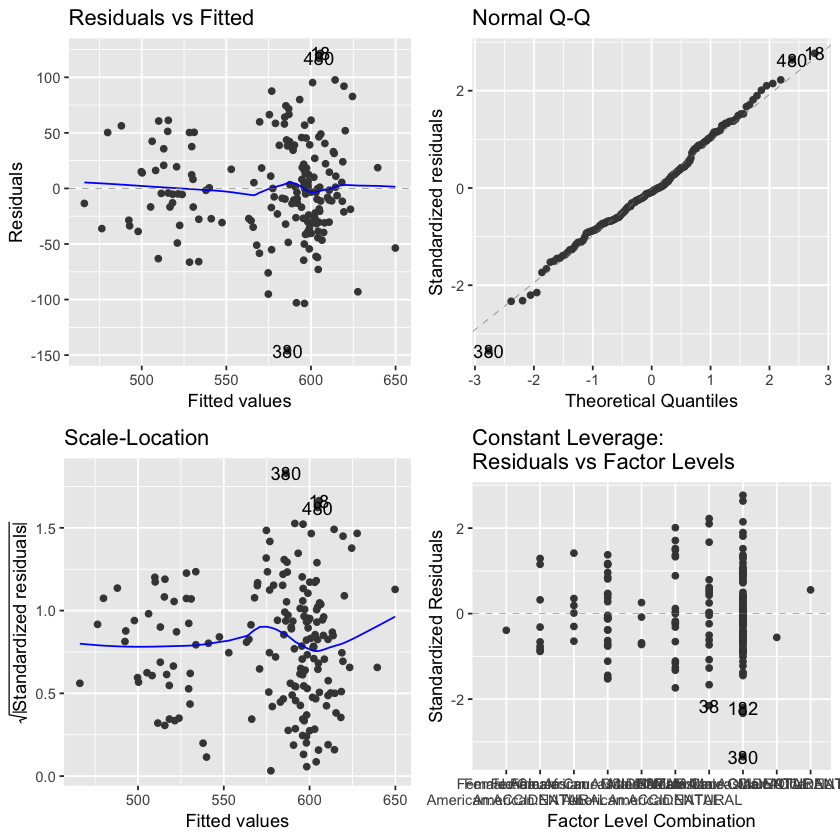

In [440]:
lmcontrol <- lm(fresh_cerebrum_volume ~ sex + age + WEIGHT + HEIGHT + PMI + race + CASEINFOMANNER, data = controlclean)
summary(lmcontrol)
autoplot(lmcontrol)

In [530]:
summary(controlclean$Diagnosis)
print("Age")
summary(controlclean$age)
print("Sex")
summary.factor(controlclean$sex)
print("Race")
summary.factor(controlclean$race)
print("PMI")
summary(controlclean$PMI)


[1] "Age"


ERROR: Error in summary(controlclean$Diagnosis) + print("Age"): non-numeric argument to binary operator


In [524]:
#lmcontrol2 <- lm(fresh_cerebrum_volume ~ sex + age + HEIGHT + race + HEIGHT*sex + race*HEIGHT + race*sex, data = controlclean)
#summary(lmcontrol2)

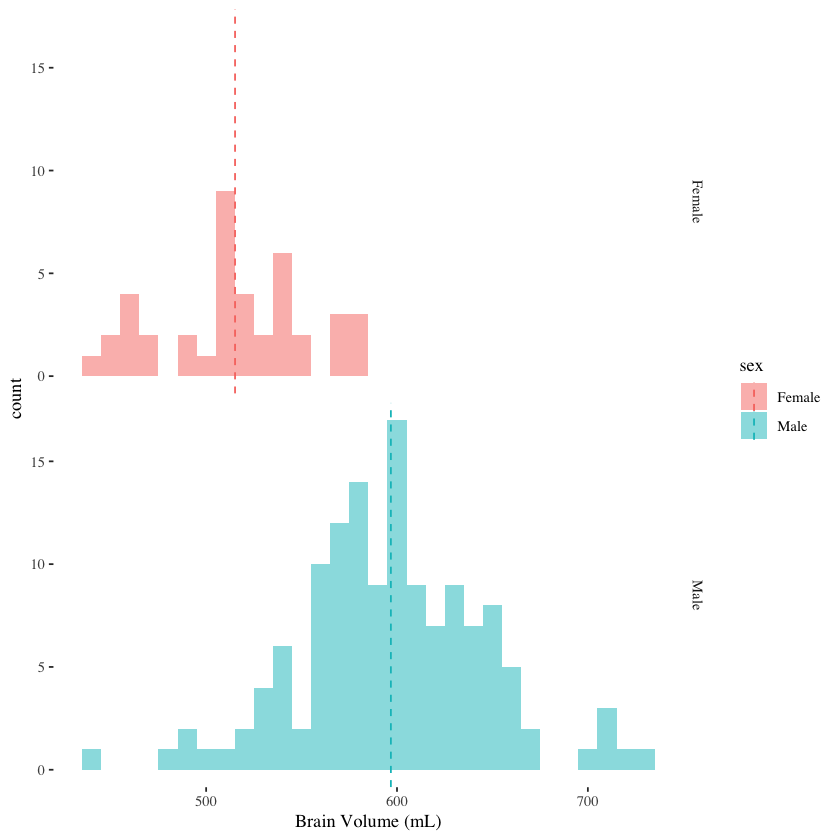

In [520]:
groupmu <- controlclean %>%
            group_by(sex) %>%
                summarize(mean_sex = mean(fresh_cerebrum_volume))
histocontrol <- ggplot(aes(fresh_cerebrum_volume, fill = sex), data = controlclean) +
                geom_histogram(binwidth = 10, alpha = 0.3, position="identity") +
                scale_x_continuous(name="Brain Volume") +
                geom_vline(data = groupmu, aes(xintercept=mean_sex, color = sex), linetype="dashed") +
                theme_tufte()
histobysex <- ggplot(aes(fresh_cerebrum_volume, fill=sex), data = controlclean) + 
                geom_histogram(binwidth=10, alpha=0.5) +
                facet_grid(sex ~ .) +
                geom_vline(data = groupmu, aes(xintercept=mean_sex, color=sex), linetype="dashed") +
                scale_x_continuous(name="Brain Volume (mL)") +
                theme_tufte()
histobysex
#ggsave("histobysex.pdf")

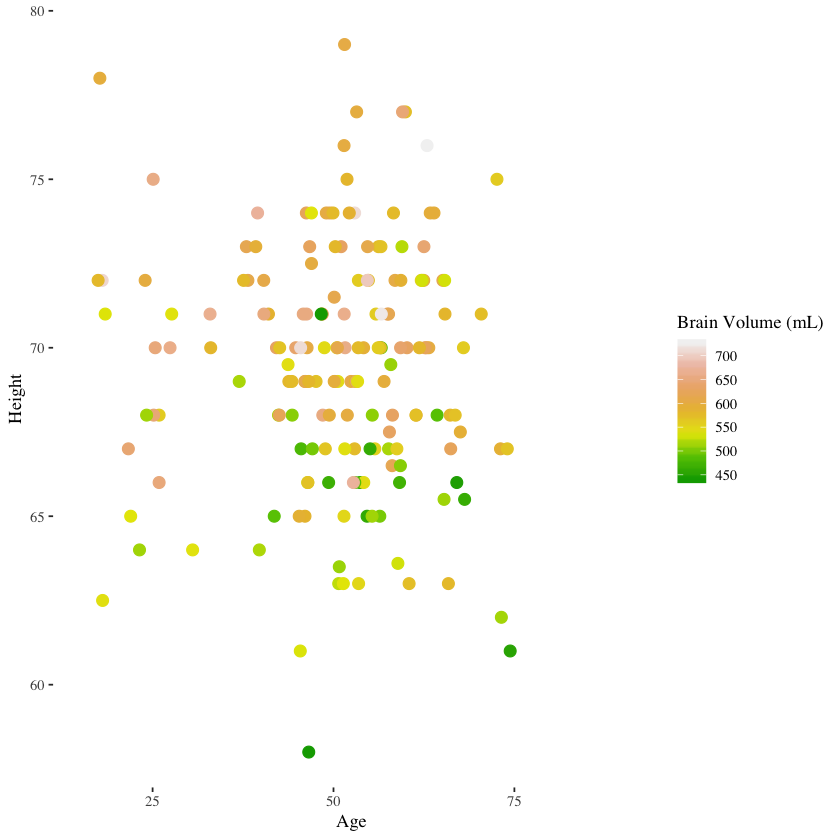

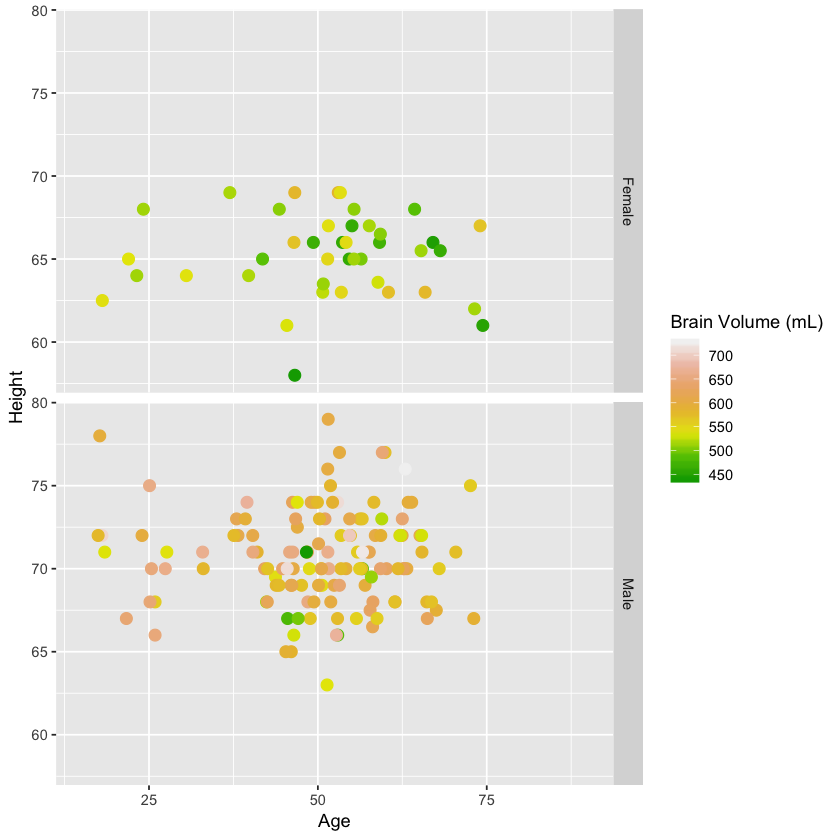

In [521]:
colorplotcontrol <- ggplot(aes(age, HEIGHT, col = fresh_cerebrum_volume), data = controlclean) + 
                    geom_point(size = 3) +
                    scale_color_gradientn(name = "Brain Volume (mL)", colours = terrain.colors(7)) +
                    theme_tufte() +
                    ylab("Height") + xlab("Age") + xlim(15, 90)
colorplotcontrol
#ggsave("colorplotcontrol.pdf")
colorplotbysex <- ggplot(aes(age, HEIGHT, col = fresh_cerebrum_volume), data = controlclean) + 
                    geom_point(size = 3) +
                    scale_color_gradientn(name = "Brain Volume (mL)", colours = terrain.colors(7)) +
                    ylab("Height") + xlab("Age") + xlim(15, 90) +
                    facet_grid(sex ~ .)
colorplotbysex
#ggsave("colorplotbysex.pdf")

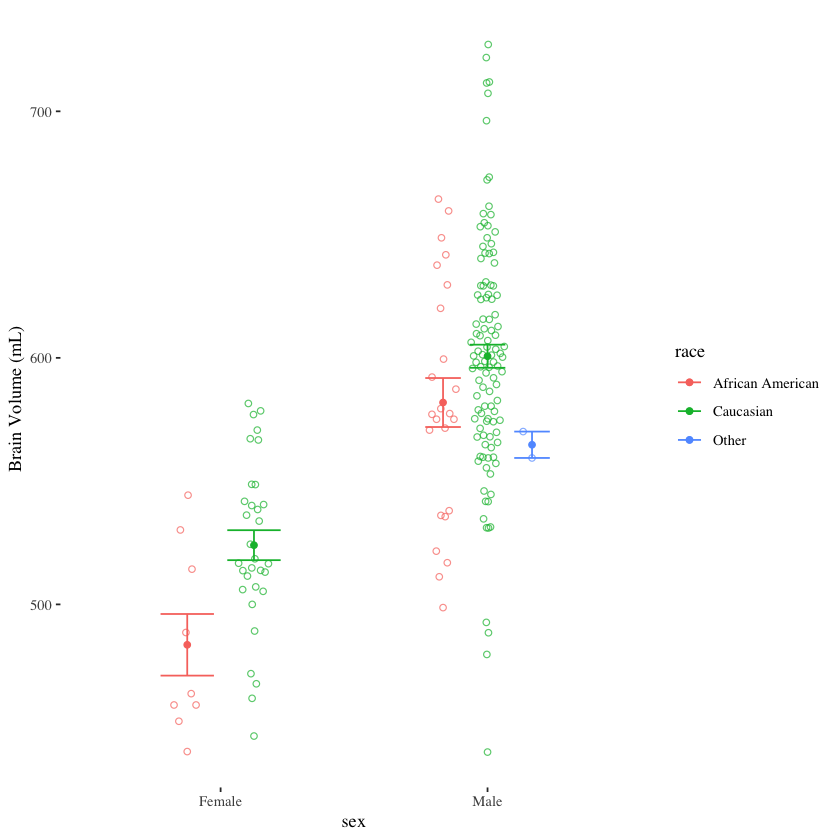

In [519]:
racescatter <- ggplot(aes(sex, fresh_cerebrum_volume, col=race), data = controlclean) +
                    geom_quasirandom(dodge.width = 0.5, shape = "circle open", alpha = 0.7)
                   # scale_colour_manual(values = c("black", "red"))
racescatter <- racescatter + stat_summary(fun.data=mean_cl_normal, geom="errorbar", width = 0.4, fun.args = list(mult=1),
                           position = position_dodge(width = 0.5)) +
                            stat_summary(fun.y=mean, geom="point", position=position_dodge(width=0.5)) +
                            theme_tufte() +
                            ylab("Brain Volume (mL)")
racescatter
#ggsave("racescatter.pdf")

In [542]:
#malecolorplot <- ggplot(subset(controlclean, sex == "Male"),
                  #  aes(age, HEIGHT, col = fresh_cerebrum_volume)) +
                #    geom_point(size = 3) + 
                 #   scale_color_gradientn(colours = terrain.colors(7)) + 
                 #   ylab("Height") + xlab("Age") + xlim(15,90)
#malecolorplot


#ggplot(subset(schiz, sex == "Male"),
                  # aes(age, fresh_cerebrum_volume, col=Diagnosis)) +
                   #geom_point()

---
### Moderation/Mediation

##### Looking at these data, it seems like the effect of sex might be mediated by height (men tend to be taller on average than women). To assess for this possibility, I used a mediation model.

In [158]:
mediatortable <- mutate(controlclean, sex_code = ifelse(sex == "Male", "1", "0"))
mediatortable2 <- mutate(mediatortable, race_code = ifelse(race == "Caucasian", "1", "0"))

In [159]:
set.seed(5)
mediator.fit <- lm(HEIGHT ~ sex_code + age + race_code, data = mediatortable2)
outcome.fit <- glm(fresh_cerebrum_volume ~ sex_code + HEIGHT + age + race_code, data = mediatortable2)
mediator.outcome <- mediate(mediator.fit, outcome.fit, boot=TRUE, treat = "sex_code", mediator = "HEIGHT", sims = 500)
summary(mediator.outcome)



Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME            14.6523       3.2098        27.12   0.012 *  
ADE             65.4732      46.2529        82.92  <2e-16 ***
Total Effect    80.1256      65.5294        92.92  <2e-16 ***
Prop. Mediated   0.1829       0.0389         0.35   0.012 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 176 


Simulations: 500 


##### Interpreting the summary output from the mediation package, the average direct effect (ADE) is much larger than the estimate for the average causal mediation effects (ACME), although the ACME is still statistically significant. This suggests the differences in brain volume due to sex might be partially mediated by height. The direct effect is the effect of X (sex) on Y (brain volume) after accoutning for the $m$ mediating variable, in this case, height.

In [ ]:
#mediator.fit2 <- glm(sex_code ~ HEIGHT + age + race_code, data = mediatortable2, family = binomial("probit"))
#outcome.fit2 <- glm(fresh_cerebrum_volume ~ sex_code + HEIGHT + age + race_code, data = mediatortable2)
#mediator.outcome2 <- mediate(mediator.fit2, outcome.fit2, treat = "sex_code", mediator = "HEIGHT", robustSE = TRUE, sims = 100)
#summary(mediator.outcome2)

---
### LASSO Model
It seems that the best model for predicting brain tissue volume among control subjects is height, age, race, and sex. Let's find the best model fit using LASSO which includes feature selection by bringing non-predictive terms to zero.

[1]  12 100

Lambda      MSE     
1  OLS         2827.308
2  Lambda 1    2756.463
3  Lambda 2    2744.205
4  Lambda 3    2744.283
5  Lambda 4    2751.278
6  Lambda 6    2773.044
7  Lambda 8    2824.154
8  Lambda 10   2919.417
9  Lambda 100  4055.734
10 Lambda 1000 4055.734
11 Lambda 1e10 4055.734

[1] 2.908462

[1] 1.067624

[1] 2743.816

(Intercept)               sexMale                   age 
        369.195233934          61.578577840          -0.337870568 
        raceCaucasian                HEIGHT                WEIGHT 
         17.390444465           2.365344817          -0.009798106 
CASEINFOMANNERNATURAL                   PMI 
         -0.219363082           0.140654852

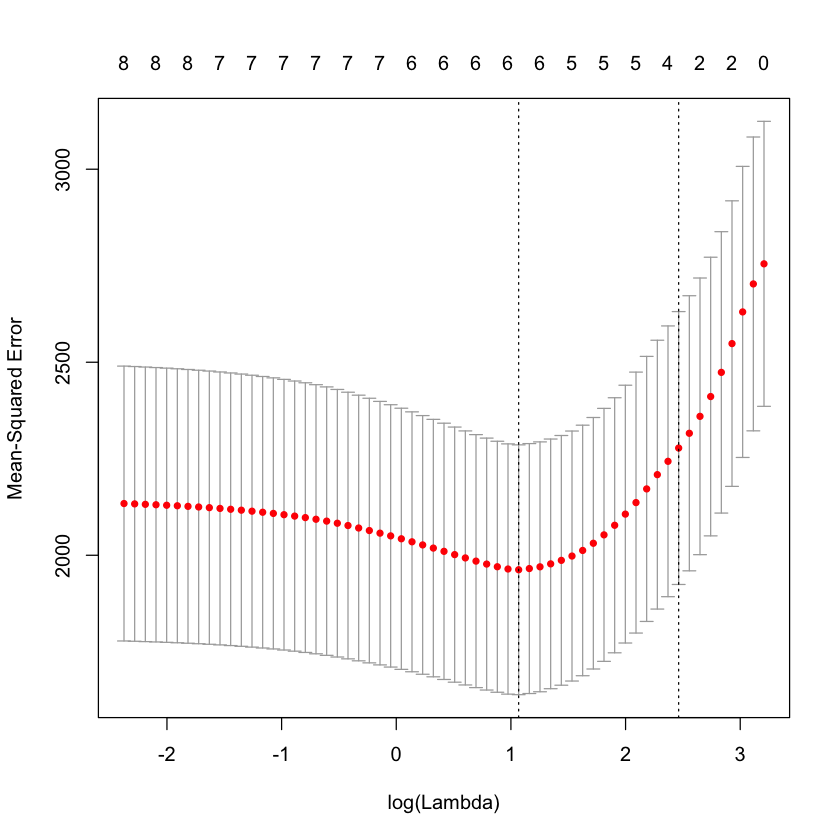

In [506]:
controltablelasso <- controlclean %>% select(-c(
                        HU_NUM, HU_CODE, Diagnosis)) # only want a table with the response (fresh_cerebrum_volume) 
                                                    #all predictors for the lasso model
x = model.matrix(fresh_cerebrum_volume~., controltablelasso) [, -1]
y = controltablelasso$fresh_cerebrum_volume
grid = 10^seq(10, -2, length=100) #creates a search space from (10^10): (10^-2), 100 samples long
lasso.control = glmnet(x, y, alpha = 1, lambda = grid)
dim(coef(lasso.control)) #so we have 12 rows for each of the 11 predictors + interceptor and 100 columns for each
#value of lambda
#next, split dataset into testing and training datasets
set.seed(5)
train=sample(1:nrow(x), nrow(x)/2)
test=(-train)
y.test = y[test]
lasso.ctlmod <- glmnet(x[train,], y[train], alpha = 1, lambda = grid, thresh=1e-12)
lasso.pred = predict(lasso.ctlmod, s = 0, newx = x[test ,])
lambda0 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 1, newx = x[test ,])
lambda1 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 2, newx = x[test ,])
lambda2 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 3, newx = x[test ,])
lambda3 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 4, newx = x[test ,])
lambda4 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 6, newx = x[test ,])
lambda6 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 8, newx = x[test ,])
lambda8 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 10, newx = x[test ,])
lambda10 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 100, newx = x[test ,])
lambda100 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 1000, newx = x[test ,])
lambda1000 <- mean((lasso.pred-y.test)^2)

lasso.pred = predict(lasso.ctlmod, s = 1e10, newx = x[test ,])
lambda1e10 <- mean((lasso.pred-y.test)^2)

Lambda <- c("OLS", "Lambda 1", "Lambda 2", "Lambda 3", "Lambda 4", "Lambda 6", "Lambda 8", "Lambda 10", "Lambda 100", "Lambda 1000", "Lambda 1e10")
MSE <- c(lambda0, lambda1, lambda2, lambda3, lambda4, lambda6, lambda8, lambda10, lambda100, lambda1000, lambda1e10)
lambtable <- data.frame(Lambda, MSE)

lambtable

#now need to predict 
set.seed(5)
cv.out = cv.glmnet(x[train,], y[train], alpha = 1)
bestlam = cv.out$lambda.min
bestlam #the best lambda is given as 2.9085
plot(cv.out)
log(bestlam) #the first dotted line on the plot shows where log(bestlam) is.

#finally, need to find the MSE associated with the best lambda and refit the lasso by cross-validation
lasso.bestctl = predict(lasso.ctlmod, s = bestlam, newx = x[test ,])
mean((lasso.bestctl-y.test)^2) #2743.81 is the lowest possible MSE.
out = glmnet(x, y, alpha = 1)
alllassocoef = predict(out, type = "coefficients", s = bestlam)[1:12 ,]
alllassocoef[alllassocoef !=0]

In [516]:
#user lme4 package
mlmcontrol <- lmer(fresh_cerebrum_volume ~ sex + age + PMI + race + HEIGHT + WEIGHT + CASEINFOMANNER + (1|HU_CODE), data = controlclean)
summary(mlmcontrol)

rlmcontrol <- lm(fresh_cerebrum_volume ~ sex + age + race + HEIGHT, data = controlclean)
rmlmcontrol <- lmer(fresh_cerebrum_volume ~ sex + age + race + HEIGHT + (1|HU_CODE), data = controlclean)



Linear mixed model fit by REML ['lmerMod']
Formula: fresh_cerebrum_volume ~ sex + age + PMI + race + HEIGHT + WEIGHT +  
    CASEINFOMANNER + (1 | HU_CODE)
   Data: controlclean

REML criterion at convergence: 1799.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1918 -0.6309 -0.0825  0.6941  2.6389 

Random effects:
 Groups   Name        Variance Std.Dev.
 HU_CODE  (Intercept)   27.47   5.241  
 Residual             1996.58  44.683  
Number of obs: 176, groups:  HU_CODE, 11

Fixed effects:
                       Estimate Std. Error t value
(Intercept)           321.62355   85.89598   3.744
sexMale                67.95160   10.57332   6.427
age                    -0.53445    0.28153  -1.898
PMI                     0.52783    0.50310   1.049
raceCaucasian          22.37075    8.97547   2.492
raceOther              -5.09708   33.50144  -0.152
HEIGHT                  3.29858    1.32974   2.481
WEIGHT                 -0.09917    0.07013  -1.414
CASEINFOMANNERNATURAL  -5.27

In [517]:
criteria <- AIC(lmcontrol, mlmcontrol)
criteria
criteria2 <- AIC(rlmcontrol, rmlmcontrol)
criteria2
criteria3 <- AIC(lmcontrol, rlmcontrol)
criteria3

df AIC     
lmcontrol  10 1849.925
mlmcontrol 11 1821.922

df AIC     
rlmcontrol  7  1847.698
rmlmcontrol 8  1822.737

df AIC     
lmcontrol  10 1849.925
rlmcontrol  7 1847.698

## Part 2. Which psychiatric diagnoses are associated with lower brain tissue volumes?

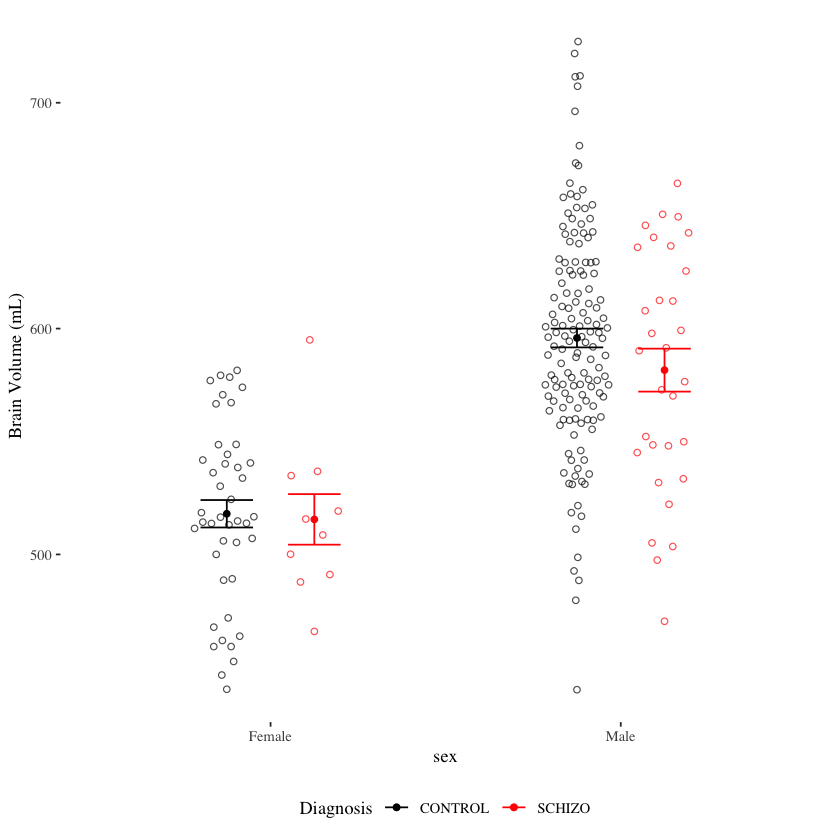

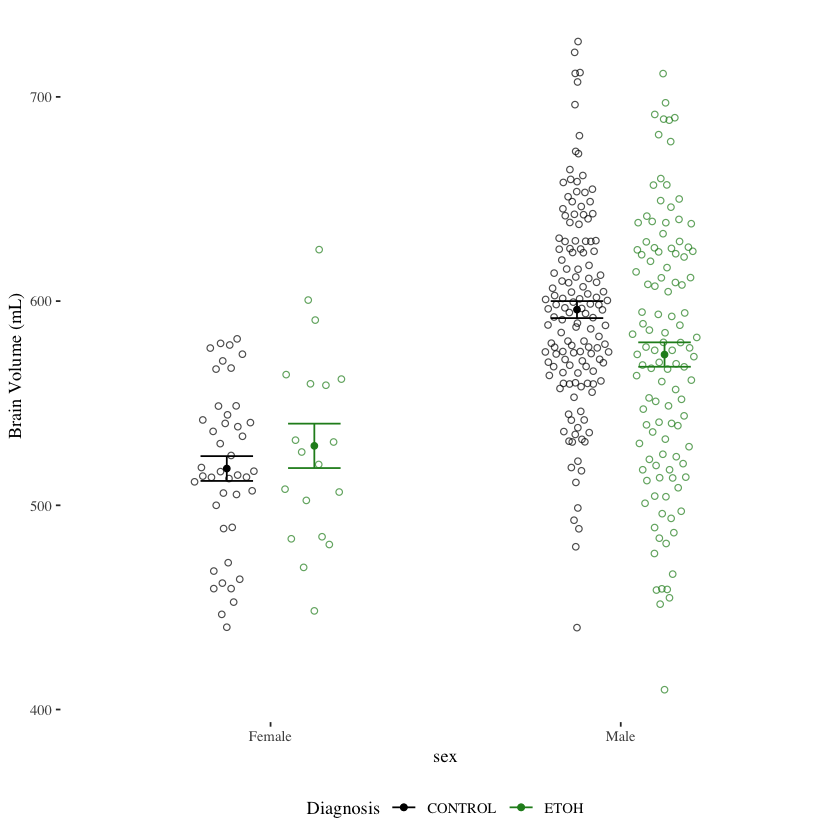

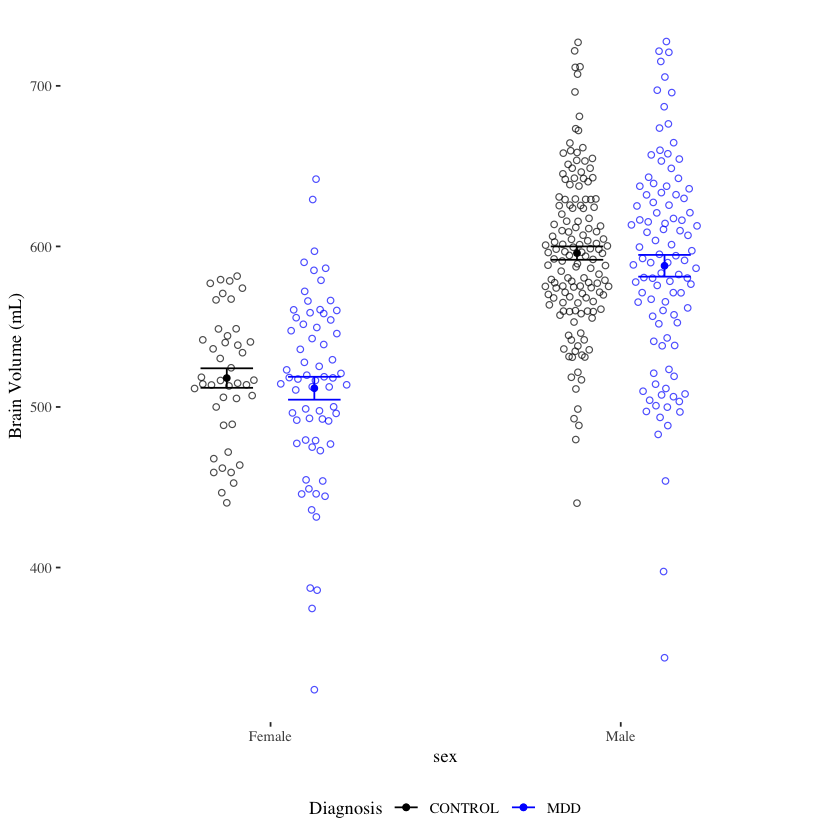

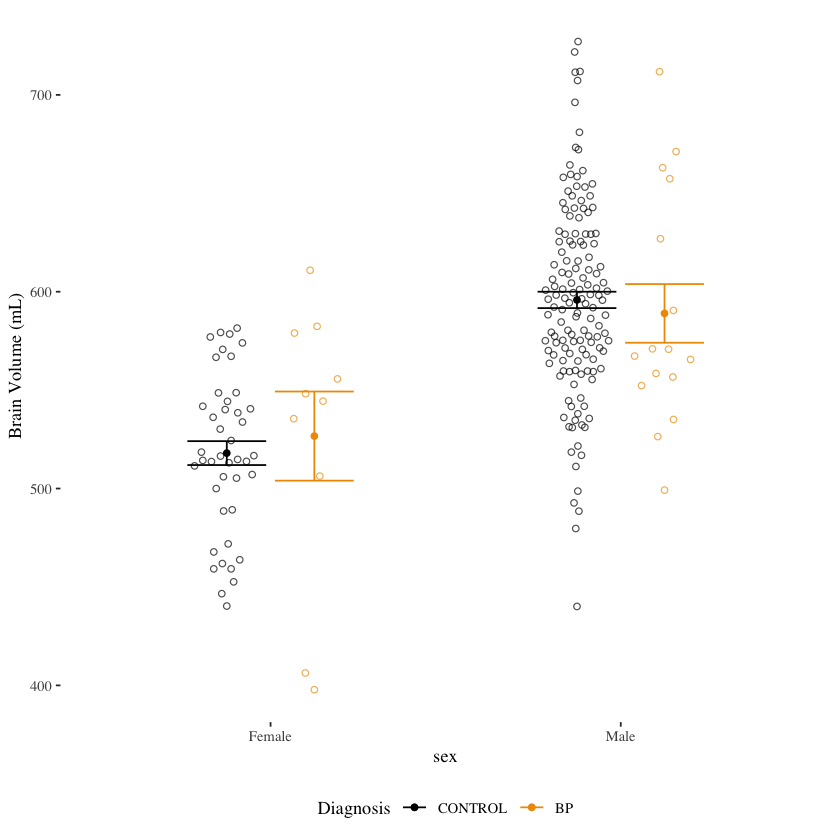

In [518]:
scatterschiz <- ggplot(aes(sex, fresh_cerebrum_volume, col=Diagnosis), data = schiztable) +
                    geom_quasirandom(dodge.width = 0.5, shape = "circle open", alpha = 0.7) +
                    scale_colour_manual(values = c("black", "red"))
scatterschiz <- scatterschiz + stat_summary(fun.data=mean_cl_normal, geom="errorbar", width = 0.3, fun.args = list(mult=1),
                           position = position_dodge(width = 0.5)) +
                            stat_summary(fun.y=mean, geom="point", position=position_dodge(width=0.5)) +
                            theme_tufte() + 
                            theme(legend.position = "bottom") +
                            ylab("Brain Volume (mL)")


scatteretoh <- ggplot(aes(sex, fresh_cerebrum_volume, col=Diagnosis), data = etohtable) +
                    geom_quasirandom(dodge.width = 0.5, shape = "circle open", alpha = 0.7) +
                    scale_colour_manual(values = c("black", "forestgreen"))
scatteretoh <- scatteretoh + stat_summary(fun.data=mean_cl_normal, geom="errorbar", width = 0.3, fun.args = list(mult=1),
                           position = position_dodge(width = 0.5)) +
                            stat_summary(fun.y=mean, geom="point", position=position_dodge(width=0.5)) +
                            theme_tufte() +
                            theme(legend.position = "bottom") +
                            ylab("Brain Volume (mL)")


scattermdd <- ggplot(aes(sex, fresh_cerebrum_volume, col=Diagnosis, group = Diagnosis), data = mddtable) +
                    geom_quasirandom(dodge.width = 0.5, shape = "circle open", alpha = 0.7) +
                    scale_colour_manual(values = c("black", "blue"))
scattermdd <- scattermdd + stat_summary(fun.data=mean_cl_normal, geom="errorbar", width = 0.3, fun.args = list(mult=1),
                           position = position_dodge(width = 0.5)) +
                            stat_summary(fun.y=mean, geom="point", position=position_dodge(width=0.5)) +
                            theme_tufte() +
                            theme(legend.position = "bottom") +
                            ylab("Brain Volume (mL)")

bipolartable$Diagnosis <- factor(bipolartable$Diagnosis, levels = c("CONTROL", "BP"))
scatterbp <- ggplot(aes(sex, fresh_cerebrum_volume, col=Diagnosis), data = bipolartable) +
            geom_quasirandom(dodge.width = 0.5, shape = "circle open", alpha = 0.7) +
            scale_colour_manual(values = c("black", "orange2"))
           # scale_x_discrete(limits=c(CONTROL, BP))
scatterbp <- scatterbp + stat_summary(fun.data=mean_cl_normal, geom="errorbar", width = 0.5, fun.args = list(mult=1),
                           position = position_dodge2(width = 0.5)) +
                            stat_summary(fun.y=mean, geom="point", position=position_dodge2(width=0.5)) +
                            theme_tufte() +
                            theme(legend.position = "bottom") +
                            ylab("Brain Volume (mL)")

#grid.arrange(scatterschiz, scatteretoh, scattermdd, scatterbp, ncol = 2)
scatterschiz
#ggsave("scatterschiz.pdf")
scatteretoh
#ggsave("scatteretoh.pdf")
scattermdd
#ggsave("scattermdd.pdf")
scatterbp
#ggsave("scatterbp.pdf")
#volumetableclean1$Diagnosis <- factor(volumetableclean1$Diagnosis, levels = c("CONTROL", "BP", "MDD", "ETOH", "SCHIZO"))
#scatterall <-  [...] facet.wrap(~. Diagnosis) will try this another day

In [380]:
schizmale = subset(schiztable, sex == "Male")
etohmale = subset(etohtable, sex == "Male")

In [462]:
lmetoh <- lm(fresh_cerebrum_volume ~ Diagnosis + sex + HEIGHT + race + age + ETOHcode, data = etohtable)
summary(lmetoh)


Call:
lm(formula = fresh_cerebrum_volume ~ Diagnosis + sex + HEIGHT + 
    race + age + ETOHcode, data = etoh)

Residuals:
     Min       1Q   Median       3Q      Max 
-163.146  -30.766   -0.019   28.534  146.282 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             422.1126    69.2987   6.091 3.44e-09 ***
DiagnosisETOH           -11.0138     7.5204  -1.465   0.1441    
sexMale                  56.0264     9.2059   6.086 3.54e-09 ***
HEIGHT                    2.2705     1.0395   2.184   0.0297 *  
raceCaucasian            30.2180     7.4681   4.046 6.63e-05 ***
raceOther                18.7341    35.8467   0.523   0.6016    
age                      -1.3727     0.2265  -6.060 4.10e-09 ***
ETOHcodeModerate/Severe -20.0228     8.8176  -2.271   0.0239 *  
ETOHcodeNA                    NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual s

In [463]:
lmetoh2 <- lm(fresh_cerebrum_volume ~ Diagnosis + sex + HEIGHT + race + age + ETOHcode + age*Diagnosis, data = etohtable)
summary(lmetoh2)


Call:
lm(formula = fresh_cerebrum_volume ~ Diagnosis + sex + HEIGHT + 
    race + age + ETOHcode + age * Diagnosis, data = etoh)

Residuals:
     Min       1Q   Median       3Q      Max 
-161.978  -33.100   -1.954   31.707  159.171 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             393.4264    68.2537   5.764 2.05e-08 ***
DiagnosisETOH            67.2367    22.0810   3.045 0.002535 ** 
sexMale                  59.3202     9.0527   6.553 2.48e-10 ***
HEIGHT                    2.1131     1.0182   2.075 0.038820 *  
raceCaucasian            29.2421     7.3140   3.998 8.06e-05 ***
raceOther                 6.2856    35.2407   0.178 0.858560    
age                      -0.6197     0.2988  -2.074 0.038932 *  
ETOHcodeModerate/Severe -15.8919     8.6998  -1.827 0.068747 .  
ETOHcodeNA                    NA         NA      NA       NA    
DiagnosisETOH:age        -1.6768     0.4461  -3.759 0.000205

In [385]:
summary.factor(etohmale$ETOHcode)

Mild Moderate/Severe              NA 
             53              62             141

In [384]:
etohmale

Diagnosis HU_NUM sex  age  
1   CONTROL   1274   Male 73.08
3   CONTROL   1278   Male 50.22
6   CONTROL   1284   Male 55.71
7   ETOH      1286   Male 47.23
8   ETOH      1288   Male 59.03
10  CONTROL   1290   Male 46.04
14  CONTROL   1298   Male 48.74
18  CONTROL   1304   Male 62.93
20  CONTROL   1306   Male 18.03
21  CONTROL   1307   Male 32.94
22  ETOH      1308   Male 58.20
27  CONTROL   1317   Male 56.43
28  CONTROL   1318   Male 58.50
29  ETOH      1319   Male 55.42
31  CONTROL   1322   Male 62.82
32  CONTROL   1324   Male 43.72
33  ETOH      1325   Male 22.04
34  CONTROL   1326   Male 58.15
37  CONTROL   1333   Male 46.06
38  CONTROL   1335   Male 18.45
39  CONTROL   1336   Male 65.12
46  ETOH      1343   Male 56.99
47  ETOH      1344   Male 61.80
48  ETOH      1345   Male 58.84
49  ETOH      1346   Male 53.96
51  ETOH      1348   Male 56.23
53  CONTROL   1350   Male 21.65
55  ETOH      1353   Male 59.46
56  CONTROL   1354   Male 60.16
65  ETOH      1370   Male 38.67
66  CONTROL   1371   Male 33.03
67  CONTROL   1372   Male 37.96
68  CONTROL   1374   Male 43.83
72  CONTROL   1384   Male 67.53
73  CONTROL   1386   Male 46.35
78  CONTROL   1394   Male 45.26
80  ETOH      1398   Male 57.72
81  CONTROL   1400   Male 50.60
84  CONTROL   1406   Male 27.64
86  CONTROL   1409   Male 51.46
87  ETOH      1410   Male 55.00
88  ETOH      1412   Male 28.50
91  ETOH      1415   Male 42.37
93  ETOH      1419   Male 34.85
95  ETOH      1422   Male 56.89
96  ETOH      1425   Male 43.47
97  ETOH      1427   Male 28.30
98  CONTROL   1429   Male 44.78
100 ETOH      1431   Male 18.30
102 CONTROL   1433   Male 65.41
⋮   ⋮         ⋮      ⋮    ⋮    
429 CONTROL   13138  Male 40.36
430 CONTROL   13140  Male 46.96
434 CONTROL   13144  Male 54.68
438 CONTROL   13152  Male 23.97
441 ETOH      13162  Male 46.20
442 CONTROL   13164  Male 62.13
444 CONTROL   13167  Male 64.41
446 CONTROL   13170  Male 59.54
454 CONTROL   13184  Male 63.37
458 ETOH      13190  Male 56.83
460 ETOH      13193  Male 38.61
461 ETOH      13194  Male 57.95
462 ETOH      13195  Male 54.36
463 ETOH      13197  Male 57.30
464 CONTROL   13198  Male 51.61
465 ETOH      13199  Male 48.38
466 ETOH      13201  Male 58.42
468 ETOH      13203  Male 65.39
471 CONTROL   13212  Male 62.25
477 CONTROL   13221  Male 59.70
478 CONTROL   13222  Male 58.29
480 ETOH      13227  Male 33.70
481 CONTROL   13228  Male 56.61
483 CONTROL   13231  Male 53.07
484 CONTROL   13232  Male 65.36
487 CONTROL   13237  Male 25.08
488 ETOH      13238  Male 43.13
491 ETOH      13242  Male 56.42
495 CONTROL   13251  Male 52.91
496 ETOH      13252  Male 49.28
498 CONTROL   13256  Male 52.75
500 CONTROL   13258  Male 42.56
501 CONTROL   13259  Male 48.02
503 ETOH      13261  Male 59.63
505 ETOH      13265  Male 28.25
508 ETOH      13270  Male 53.63
511 CONTROL   13277  Male 51.48
516 CONTROL   13290  Male 56.18
517 CONTROL   13291  Male 37.57
518 CONTROL   13295  Male 49.42
519 CONTROL   13298  Male 50.54
521 CONTROL   13301  Male 17.47
522 CONTROL   13302  Male 46.71
532 CONTROL   13333  Male 40.38
537 CONTROL   13350  Male 45.82
538 CONTROL   13353  Male 47.08
546 CONTROL   13376  Male 70.42
551 ETOH      13395  Male 41.63
552 CONTROL   13400  Male 42.40
553 CONTROL   13405  Male 42.51
    medslist_atod                                                                                                                                                                    
1   CARDIZEM, CARDURA, COLCHICINE, PEPCID                                                                                                                                            
3   NA                                                                                                                                                                               
6   NA                                                                                                                                                                               
7   NA      

Saving 7 x 7 in image


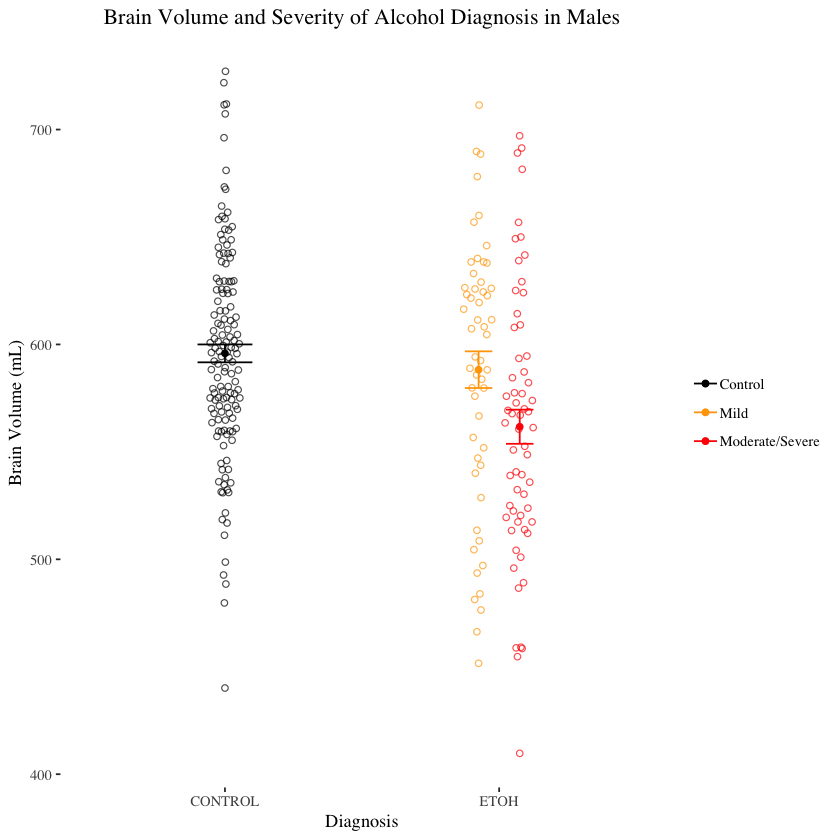

In [509]:
#scatteretohsev <- ggplot(aes(Diagnosis, fresh_cerebrum_volume, 
#                             col=ifelse(ETOHpres == "1" & ETOHcode == "Moderate/Severe", 'Moderate/Severe', 'Mild/NA')), data = etohmale) +
#            geom_jitter(width = 0.3, shape = "circle open", alpha = 0.4)
#scatteretohsev1 <- scatteretohsev + stat_summary(fun.data=mean_cl_normal, geom="errorbar", width = 0.3, fun.args = list(mult=1),
#                           position = position_dodge(width = 0.5)) +
#                            stat_summary(fun.y=mean, geom="point", position=position_dodge2(reverse = TRUE, width=0.3)) +
#                            theme_tufte() +
#                            theme(legend.position = "bottom")
#scatteretohsev1


scatteretohsev <- ggplot(aes(Diagnosis, fresh_cerebrum_volume, col = ifelse(ETOHcode == "Moderate/Severe", 'Moderate/Severe', 
                                                                            ifelse(ETOHcode == 'Mild', 'Mild',
                                                                            #ifelse(ETOHpres == "1" & ETOHcode == "NA", "NA",
                                                                            #ifelse(ETOHpres == "0", 'Control',
                                                                           'Control'))), data = etohmale) +
                    geom_quasirandom(dodge.width = 0.3, shape = "circle open", alpha = 0.8)
                    
        
scatteretohsev1 <- scatteretohsev + stat_summary(fun.data=mean_cl_normal, geom="errorbar", width = 0.2, fun.args = list(mult=1),
                           position = position_dodge(width = 0.3)) +
                            stat_summary(fun.y=mean, geom="point", position=position_dodge(width=0.3)) +
                            theme_tufte() + 
                            theme(legend.title = element_blank()) +
                            scale_color_manual(values = c('black', 'orange', 'red')) +
                            ylab("Brain Volume (mL)") +
                            ggtitle("Brain Volume and Severity of Alcohol Diagnosis in Males") +
                            theme(plot.title = element_text(hjust = 0.5))
scatteretohsev1
#ggsave("scatteretohsev1males.pdf")



In [306]:
ggsave("ETOH_Severity.jpg")

Saving 7 x 7 in image


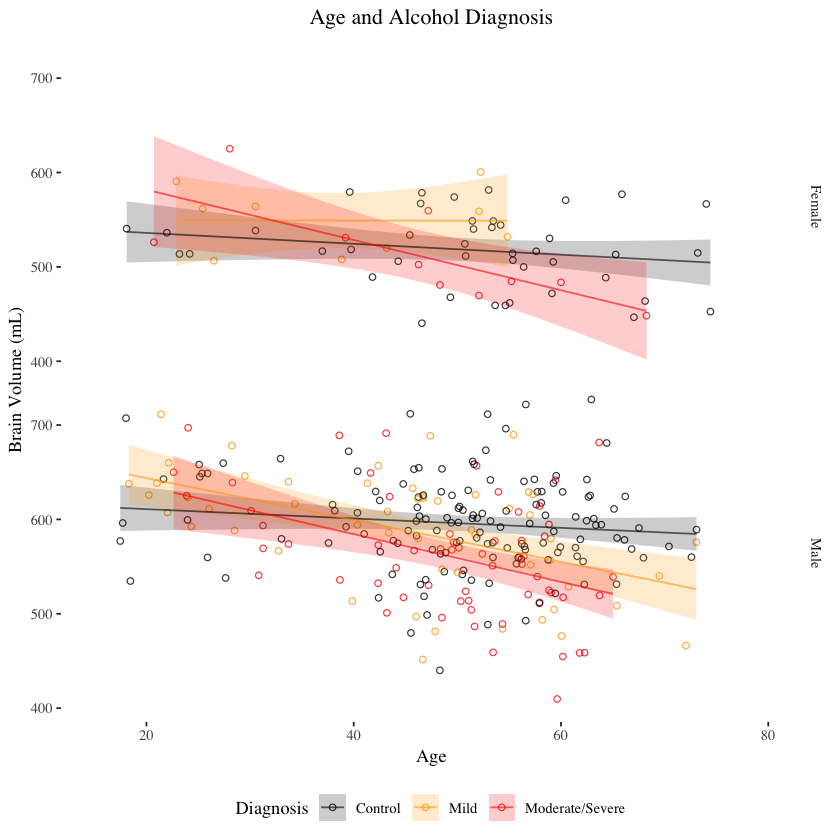

In [517]:
ageetoh <- ggplot(aes(age, fresh_cerebrum_volume, fill = ifelse(ETOHcode == "Moderate/Severe", 'Moderate/Severe', 
                                                                            ifelse(ETOHcode == 'Mild', 'Mild',
                                                                           'Control')),
                                                        col = ifelse(ETOHcode == "Moderate/Severe", 'Moderate/Severe', 
                                                                            ifelse(ETOHcode == 'Mild', 'Mild',
                                                                           'Control'))), data = etohtable) + 
                        geom_point(shape = "circle open", alpha = 0.8) +
                        geom_ribbon(stat = 'smooth', method = "lm", alpha = 0.2, color = NA) +
                        geom_line(stat = 'smooth', method = 'lm', alpha = 0.6) +
                        #geom_smooth(method = 'lm', se = T, alpha = 0.5) +
                        theme_tufte() +
                        theme(legend.position = "bottom", legend.direction = "horizontal") +
                        labs(fill = "Diagnosis") +
                        labs(color = "Diagnosis") +
                        ylab("Brain Volume (mL)") + xlab("Age") + xlim(15,80) +
                        ggtitle("Age and Alcohol Diagnosis") +
                        theme(plot.title = element_text(hjust = 0.5)) +
                        scale_fill_manual(values = c('black', 'orange', 'red')) +
                        scale_color_manual(values = c('black', 'orange', 'red')) +
                        facet_grid(sex ~ .)
ageetoh
#ggsave("ageetoh.pdf")

In [493]:
set.seed(5)
mediatoretohtable <- mutate(etohmale, race_code = ifelse(race == "Caucasian", "1", "0"))
mediatoretohtable <- mutate(mediatoretohtable, ETOH_code = ifelse(ETOHpres == "1" & ETOHcode == "Moderate/Severe", "1", 
                                                                 ifelse(ETOHpres == "1" & ETOHcode == "Mild", "0",
                                                                       "NA")))
mediatoretohtable$ETOH_code <- as.numeric(mediatoretohtable$ETOH_code)
mediatoretohtable$race_code <- as.numeric(mediatoretohtable$race_code)
str(mediatoretohtable)
summary.factor(mediatoretohtable$ETOH_code)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

'data.frame':	256 obs. of  23 variables:
 $ Diagnosis               : Factor w/ 5 levels "BP","CONTROL",..: 2 2 2 3 3 2 2 2 2 2 ...
 $ HU_NUM                  : int  1274 1278 1284 1286 1288 1290 1298 1304 1306 1307 ...
 $ sex                     : chr  "Male" "Male" "Male" "Male" ...
 $ age                     : num  73.1 50.2 55.7 47.2 59 ...
 $ medslist_atod           : Factor w/ 348 levels "ABILIFY, ADDERALL, ADDERALL XR, MELATONIN, SEROQUEL, WELLBUTRIN",..: 209 NA NA NA 316 315 NA 315 NA NA ...
 $ AGEONSET                : int  NA NA NA NA NA NA NA NA NA NA ...
 $ DURATION                : num  NA NA NA NA NA NA NA NA NA NA ...
 $ REMISLEN                : num  NA NA NA NA NA NA NA NA NA NA ...
 $ race                    : chr  "Caucasian" "Caucasian" "Caucasian" "Caucasian" ...
 $ HEIGHT                  : num  67 69 67 66 71 69 70 76 72 71 ...
 $ WEIGHT                  : int  218 193 161 220 205 161 254 240 181 268 ...
 $ CASEINFOCAUSE           : Factor w/ 370 levels "Active L

0    1 NA's 
  53   61  142

In [494]:
mediatoretohtable

Diagnosis HU_NUM sex  age  
1   CONTROL   1274   Male 73.08
2   CONTROL   1278   Male 50.22
3   CONTROL   1284   Male 55.71
4   ETOH      1286   Male 47.23
5   ETOH      1288   Male 59.03
6   CONTROL   1290   Male 46.04
7   CONTROL   1298   Male 48.74
8   CONTROL   1304   Male 62.93
9   CONTROL   1306   Male 18.03
10  CONTROL   1307   Male 32.94
11  ETOH      1308   Male 58.20
12  CONTROL   1317   Male 56.43
13  CONTROL   1318   Male 58.50
14  ETOH      1319   Male 55.42
15  CONTROL   1322   Male 62.82
16  CONTROL   1324   Male 43.72
17  ETOH      1325   Male 22.04
18  CONTROL   1326   Male 58.15
19  CONTROL   1333   Male 46.06
20  CONTROL   1335   Male 18.45
21  CONTROL   1336   Male 65.12
22  ETOH      1343   Male 56.99
23  ETOH      1344   Male 61.80
24  ETOH      1345   Male 58.84
25  ETOH      1346   Male 53.96
26  ETOH      1348   Male 56.23
27  CONTROL   1350   Male 21.65
28  ETOH      1353   Male 59.46
29  CONTROL   1354   Male 60.16
30  ETOH      1370   Male 38.67
31  CONTROL   1371   Male 33.03
32  CONTROL   1372   Male 37.96
33  CONTROL   1374   Male 43.83
34  CONTROL   1384   Male 67.53
35  CONTROL   1386   Male 46.35
36  CONTROL   1394   Male 45.26
37  ETOH      1398   Male 57.72
38  CONTROL   1400   Male 50.60
39  CONTROL   1406   Male 27.64
40  CONTROL   1409   Male 51.46
41  ETOH      1410   Male 55.00
42  ETOH      1412   Male 28.50
43  ETOH      1415   Male 42.37
44  ETOH      1419   Male 34.85
45  ETOH      1422   Male 56.89
46  ETOH      1425   Male 43.47
47  ETOH      1427   Male 28.30
48  CONTROL   1429   Male 44.78
49  ETOH      1431   Male 18.30
50  CONTROL   1433   Male 65.41
⋮   ⋮         ⋮      ⋮    ⋮    
207 CONTROL   13138  Male 40.36
208 CONTROL   13140  Male 46.96
209 CONTROL   13144  Male 54.68
210 CONTROL   13152  Male 23.97
211 ETOH      13162  Male 46.20
212 CONTROL   13164  Male 62.13
213 CONTROL   13167  Male 64.41
214 CONTROL   13170  Male 59.54
215 CONTROL   13184  Male 63.37
216 ETOH      13190  Male 56.83
217 ETOH      13193  Male 38.61
218 ETOH      13194  Male 57.95
219 ETOH      13195  Male 54.36
220 ETOH      13197  Male 57.30
221 CONTROL   13198  Male 51.61
222 ETOH      13199  Male 48.38
223 ETOH      13201  Male 58.42
224 ETOH      13203  Male 65.39
225 CONTROL   13212  Male 62.25
226 CONTROL   13221  Male 59.70
227 CONTROL   13222  Male 58.29
228 ETOH      13227  Male 33.70
229 CONTROL   13228  Male 56.61
230 CONTROL   13231  Male 53.07
231 CONTROL   13232  Male 65.36
232 CONTROL   13237  Male 25.08
233 ETOH      13238  Male 43.13
234 ETOH      13242  Male 56.42
235 CONTROL   13251  Male 52.91
236 ETOH      13252  Male 49.28
237 CONTROL   13256  Male 52.75
238 CONTROL   13258  Male 42.56
239 CONTROL   13259  Male 48.02
240 ETOH      13261  Male 59.63
241 ETOH      13265  Male 28.25
242 ETOH      13270  Male 53.63
243 CONTROL   13277  Male 51.48
244 CONTROL   13290  Male 56.18
245 CONTROL   13291  Male 37.57
246 CONTROL   13295  Male 49.42
247 CONTROL   13298  Male 50.54
248 CONTROL   13301  Male 17.47
249 CONTROL   13302  Male 46.71
250 CONTROL   13333  Male 40.38
251 CONTROL   13350  Male 45.82
252 CONTROL   13353  Male 47.08
253 CONTROL   13376  Male 70.42
254 ETOH      13395  Male 41.63
255 CONTROL   13400  Male 42.40
256 CONTROL   13405  Male 42.51
    medslist_atod                                                                                                                                                                    
1   CARDIZEM, CARDURA, COLCHICINE, PEPCID                                                                                                                                            
2   NA                                                                                                                                                                               
3   NA                                                                                                                                                                               
4   NA      

In [495]:
#set.seed(5)
mediator.etohfit <- bayesglm(ETOH_code ~ Diagnosis + age + race_code + HEIGHT, data = mediatoretohtable, family = binomial(link="logit"))
outcome.etohfit <- glm(fresh_cerebrum_volume ~ Diagnosis + ETOH_code + HEIGHT + age + race_code, data = mediatoretohtable)
mediator.etoh.outcome <- mediate(mediator.etohfit, outcome.etohfit, boot=TRUE, treat = "Diagnosis", mediator = "ETOH_code", sims = 1000)
summary(mediator.etoh.outcome)

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [259]:
install.packages("arm")
library(arm)

also installing the dependencies ‘abind’, ‘coda’




The downloaded binary packages are in
	/var/folders/3d/xmp0cm0j5kvbh5pgrr2b6scw0000gn/T//RtmpPXnLGN/downloaded_packages



arm (Version 1.10-1, built: 2018-4-12)

Working directory is /Users/sdienel/Dienel_DSPN_S19



Warning message in plot.window(...):
“"group.plots" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"group.plots" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"group.plots" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"group.plots" is not a graphical parameter”Warning message in box(...):
“"group.plots" is not a graphical parameter”Warning message in title(...):
“"group.plots" is not a graphical parameter”Warning message in axis(2, at = y.axis, labels = labels, las = 1, tick = TRUE, ...):
“"group.plots" is not a graphical parameter”

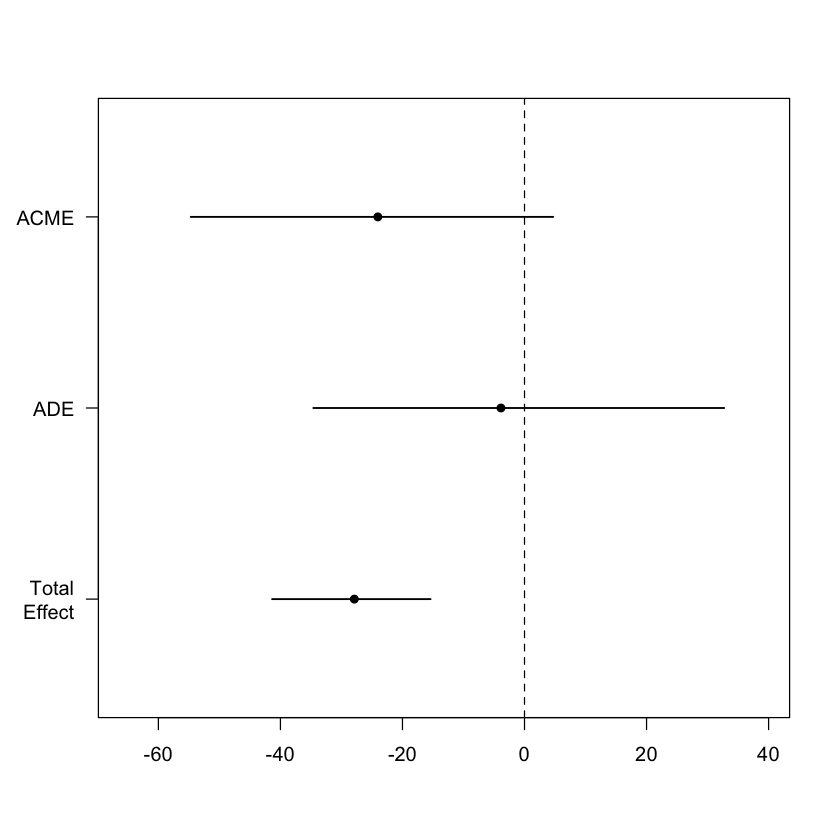

In [249]:
plot(mediator.etoh.outcome, group.plots = TRUE)

In [244]:
student

fight attachment work score late coed smorale gender income free pared
1    0     0          0    46    1    1    5       1      10     3    0    
2    1     0          0    48    5    1    5       0       9     3    0    
3    1     1          0    72    3    1    5       1      13     3    1    
4    0     1          1    57    1    1    5       0      12     3    0    
5    0     1          0    51    2    1    5       0      11     3    0    
6    0     1          1    52    2    1    5       0       7     3    0    
7    0     1          0    42    3    1    5       0       7     3    0    
8    0     1          0    41    2    1    5       0       4     3    0    
9    0     1          0    28    2    1    5       1       8     4    0    
10   0     0          0    56    1    1    5       0      12     4    1    
11   0     1          0    53    1    1    5       1      10     4    0    
12   0     1          0    41    2    1    5       1       9     4    0    
13   0     0          1    52    5    1    5       1       6     4    0    
14   0     1          1    56    1    1    5       0       8     4    1    
15   1     1          1    54    2    1    5       1       9     4    0    
16   1     1          1    53    2    1    5       0       5     4    0    
17   1     1          0    49    5    1    5       1       7     4    0    
18   0     1          1    56    2    1    5       0      10     4    1    
19   0     1          0    57    2    1    5       0       9     3    0    
20   0     1          1    61    5    1    5       1      11     3    1    
21   0     1          0    47    3    1    5       1       9     3    0    
22   0     1          0    43    1    1    5       0       7     3    0    
23   0     1          0    64    1    1    5       0      10     3    1    
24   0     0          0    51    2    1    5       0      10     3    1    
25   0     1          1    48    2    1    5       0      10     3    0    
26   0     1          1    41    2    1    5       1       5     3    0    
27   1     1          1    55    2    1    5       0       9     3    0    
28   0     1          0    55    3    1    5       1      10     3    0    
29   0     1          1    52    3    1    5       1      10     3    1    
30   0     1          1    55    1    1    5       0       8     3    1    
31   0     1          0    63    3    1    5       0      11     3    1    
32   0     0          0    48    2    1    5       1      10     3    1    
33   0     1          0    49    3    1    5       1       8     3    0    
34   0     0          0    63    1    0    5       0      11     1    1    
35   0     1          1    37    3    0    5       0       8     1    0    
36   0     1          1    49    4    0    5       0       9     1    0    
37   0     1          0    54    2    0    5       0      10     1    1    
38   0     1          0    62    2    0    5       0      10     1    0    
39   0     1          1    55    2    0    5       0      11     1    1    
40   1     1          0    37    2    0    5       0      11     1    1    
41   0     1          0    58    1    0    5       0       8     1    0    
42   1     1          0    55    2    0    5       0      10     1    0    
43   1     0          0    33    2    0    5       0       6     1    0    
44   1     1          1    55    3    0    5       0       9     1    0    
45   1     1          1    53    2    0    5       0      12     1    1    
46   0     1          0    52    3    0    5       0      11     1    0    
47   0     1          1    59    3    0    5       0      10     1    0    
48   0     1          1    60    3    0    5       1      10     1    1    
49   0     1          0    51    1    0    5       0      12     1    0    
50   0     1          1    49    5    0    5       0       8     1    0    
51   0     1          0    51    3    0    5       0       7     1    0    
52   0     0          1    50    3    0    5       0 

## 3. Is the difference in brain tissue volume observed in schizophrenia subjects attributable to comorbid alcohol use disorders?

In [232]:
lmschiz <- lm(fresh_cerebrum_volume ~ Diagnosis + sex + HEIGHT + ETOHcode + race + age, data = schiz)
summary(lmschiz)


#need to think more about including "DURATION" in this model because it gives me an error


Call:
lm(formula = fresh_cerebrum_volume ~ Diagnosis + sex + HEIGHT + 
    ETOHcode + race + age, data = schiz)

Residuals:
     Min       1Q   Median       3Q      Max 
-163.395  -30.040   -0.827   31.799  123.637 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             354.3782    73.3027   4.834 2.59e-06 ***
DiagnosisSCHIZO         -22.9426    10.3841  -2.209 0.028239 *  
sexMale                  60.6438     9.3233   6.505 5.70e-10 ***
HEIGHT                    2.9633     1.0914   2.715 0.007180 ** 
ETOHcodeModerate/Severe  10.0881    20.2273   0.499 0.618491    
ETOHcodeNA              -18.5175    17.4664  -1.060 0.290294    
raceCaucasian            27.6328     7.9764   3.464 0.000645 ***
raceOther                 5.3312    32.8278   0.162 0.871149    
age                      -0.6425     0.2446  -2.627 0.009267 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.76 on 208 degrees of f

---
##### The next question I wanted to ask was whether the effect of a schizophrenia diagnosis on brain tissue volumes is mediated by a comorbid alcohol use disorder. This question seemed apppropriate for a mediation model

In [678]:
schizetoh <- subset(schizmale, ETOHpres == "1")
summary(schizetoh)

   Diagnosis      HU_NUM          sex                 age       
 BP     : 0   Min.   : 1367   Length:18          Min.   :25.23  
 CONTROL: 1   1st Qu.: 1460   Class :character   1st Qu.:43.95  
 ETOH   : 0   Median : 1698   Mode  :character   Median :53.67  
 MDD    : 0   Mean   : 4786                      Mean   :50.47  
 SCHIZO :17   3rd Qu.:10255                      3rd Qu.:58.79  
              Max.   :13179                      Max.   :66.52  
                                                                
    AGEONSET        DURATION        REMISLEN       race          
 Min.   : 8.00   Min.   : 2.00   Min.   : NA   Length:18         
 1st Qu.:19.00   1st Qu.:24.00   1st Qu.: NA   Class :character  
 Median :22.00   Median :29.00   Median : NA   Mode  :character  
 Mean   :22.47   Mean   :27.88   Mean   :NaN                     
 3rd Qu.:26.00   3rd Qu.:33.00   3rd Qu.: NA                     
 Max.   :35.00   Max.   :49.00   Max.   : NA                     
 NA's   :1       N

In [267]:
mediatorschiztable <- mutate(schizmale, race_code = ifelse(race == "Caucasian", "1", "0"))
str(mediatorschiztable)
mediatorschiztable$ETOHpres <- as.numeric(mediatorschiztable$ETOHpres)
mediatorschiztable$race_code <- as.numeric(mediatorschiztable$race_code)
str(mediatorschiztable)

'data.frame':	172 obs. of  22 variables:
 $ Diagnosis               : Factor w/ 5 levels "BP","CONTROL",..: 2 2 2 2 5 2 2 2 2 5 ...
 $ HU_NUM                  : int  1274 1278 1284 1290 1296 1298 1304 1306 1307 1314 ...
 $ sex                     : chr  "Male" "Male" "Male" "Male" ...
 $ age                     : num  73.1 50.2 55.7 46 48.1 ...
 $ medslist_atod           : Factor w/ 348 levels "ABILIFY, ADDERALL, ADDERALL XR, MELATONIN, SEROQUEL, WELLBUTRIN",..: 209 NA NA 315 10 NA 315 NA NA 104 ...
 $ AGEONSET                : int  NA NA NA NA 13 NA NA NA NA 17 ...
 $ DURATION                : num  NA NA NA NA 35 NA NA NA NA 33 ...
 $ REMISLEN                : num  NA NA NA NA NA NA NA NA NA NA ...
 $ race                    : chr  "Caucasian" "Caucasian" "Caucasian" "Caucasian" ...
 $ HEIGHT                  : num  67 69 67 69 68 70 76 72 71 69 ...
 $ WEIGHT                  : int  218 193 161 161 110 254 240 181 268 150 ...
 $ CASEINFOCAUSE           : Factor w/ 370 levels "Active L

In [496]:
set.seed(5)
mediator.fit <- bayesglm(ETOHpres ~ Diagnosis + age + race_code + HEIGHT, data = mediatorschiztable, family = binomial("logit"))
outcome.fit <- glm(fresh_cerebrum_volume ~ Diagnosis + ETOHpres + HEIGHT + age + race_code, data = mediatorschiztable)
mediator.sch.outcome <- mediate(mediator.fit, outcome.fit, boot=TRUE, treat = "Diagnosis", mediator = "ETOHpres", sims = 500)
summary(mediator.sch.outcome)

Warning message in mediate(mediator.fit, outcome.fit, boot = TRUE, treat = "Diagnosis", :
“treatment and control values do not match factor levels; using CONTROL and SCHIZO as control and treatment, respectively”


Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value  
ACME              9.556       -5.951        25.74   0.272  
ADE             -23.556      -48.532        -0.36   0.048 *
Total Effect    -14.000      -33.811         3.94   0.108  
Prop. Mediated   -0.683       -6.395         4.88   0.372  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 166 


Simulations: 500 


Saving 7 x 7 in image


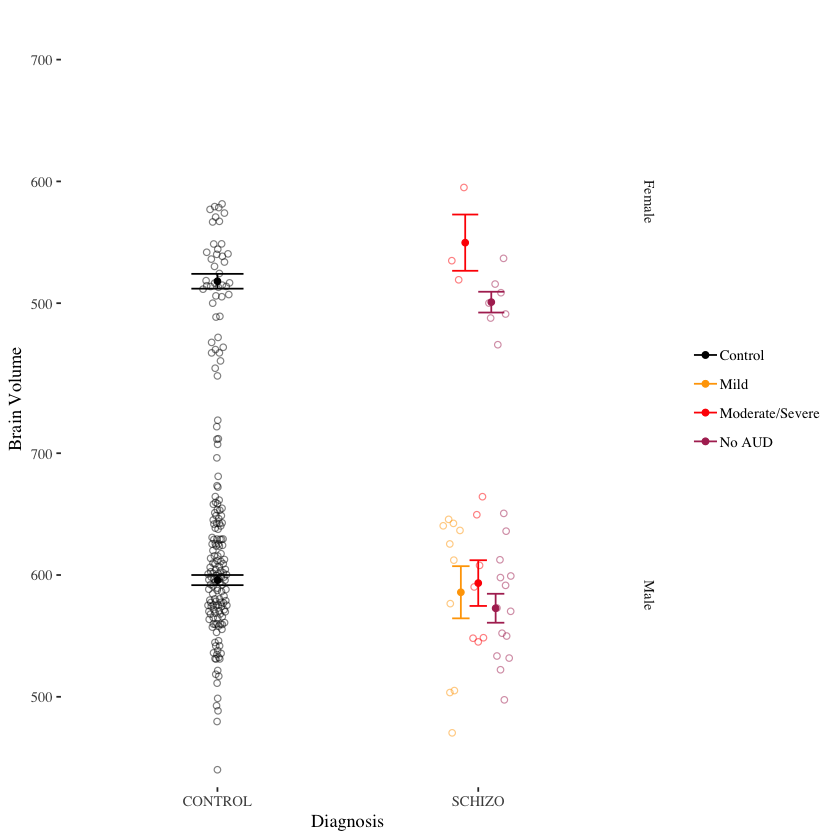

In [511]:
scatterschizetoh <- ggplot(aes(Diagnosis, fresh_cerebrum_volume, col = ifelse(Diagnosis == "SCHIZO" & ETOHcode == "Moderate/Severe", 'Moderate/Severe', 
                                                                            ifelse(Diagnosis == "SCHIZO" & ETOHcode == 'Mild', 'Mild',
                                                                                ifelse(Diagnosis == "SCHIZO" & ETOHcode == 'NA', 'No AUD',
                                                                            #ifelse(ETOHpres == "1" & ETOHcode == "NA", "NA",
                                                                            #ifelse(ETOHpres == "0", 'Control',
                                                                           'Control')))), data = schiztable) +
                    geom_quasirandom(dodge.width = 0.3, shape = "circle open", alpha = 0.5)
                    
        
scatterschizetoh1 <- scatterschizetoh + stat_summary(fun.data=mean_cl_normal, geom="errorbar", width = 0.2, fun.args = list(mult=1),
                           position = position_dodge(width = 0.2)) +
                            stat_summary(fun.y=mean, geom="point", position=position_dodge(width=0.2)) +
                            theme_tufte() + 
                            theme(legend.title = element_blank()) +
                            scale_color_manual(values = c('black', 'orange', 'red', 'maroon')) +
                            ylab("Brain Volume") +
                            facet_grid(sex ~ .)
scatterschizetoh1
#ggsave("scatterschizetoh1.pdf")

In [515]:
lmschiz <- lm(fresh_cerebrum_volume ~ Diagnosis + sex + HEIGHT + race + age + ETOHcode, data = schiz)
summary(lmschiz)


Call:
lm(formula = fresh_cerebrum_volume ~ Diagnosis + sex + HEIGHT + 
    race + age + ETOHcode, data = schiz)

Residuals:
     Min       1Q   Median       3Q      Max 
-163.395  -30.040   -0.827   31.799  123.637 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             354.3782    73.3027   4.834 2.59e-06 ***
DiagnosisSCHIZO         -22.9426    10.3841  -2.209 0.028239 *  
sexMale                  60.6438     9.3233   6.505 5.70e-10 ***
HEIGHT                    2.9633     1.0914   2.715 0.007180 ** 
raceCaucasian            27.6328     7.9764   3.464 0.000645 ***
raceOther                 5.3312    32.8278   0.162 0.871149    
age                      -0.6425     0.2446  -2.627 0.009267 ** 
ETOHcodeModerate/Severe  10.0881    20.2273   0.499 0.618491    
ETOHcodeNA              -18.5175    17.4664  -1.060 0.290294    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.76 on 208 degrees of f

In [ ]:
lmschizmale <- 

In [293]:
schizpct <- mutate(schiz, percent_change = ((fresh_cerebrum_volume - frozen_cerebrum_volume)/(fresh_cerebrum_volume))*100)

In [294]:
etohpct <- mutate(etoh, percent_change = ((fresh_cerebrum_volume - frozen_cerebrum_volume)/(fresh_cerebrum_volume))*100)






Warning message:
“Removed 3 rows containing non-finite values (stat_summary).”Warning message:
“Removed 3 rows containing non-finite values (stat_summary).”Warning message:
“Removed 3 rows containing missing values (position_quasirandom).”Warning message:
“Removed 4 rows containing non-finite values (stat_summary).”Warning message:
“Removed 4 rows containing non-finite values (stat_summary).”Warning message:
“Removed 4 rows containing missing values (position_quasirandom).”

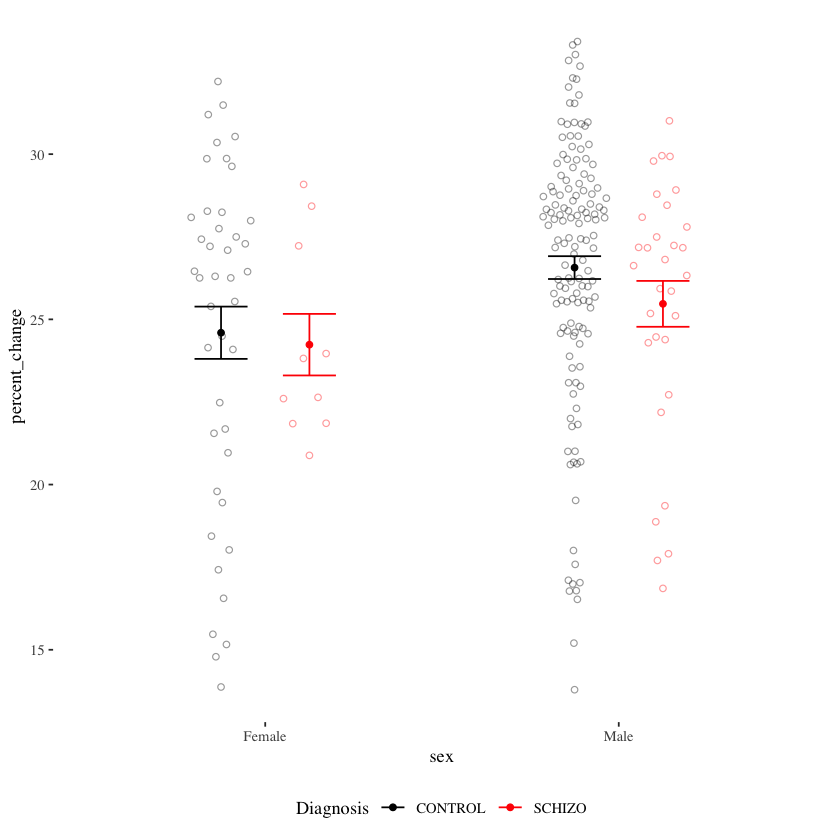

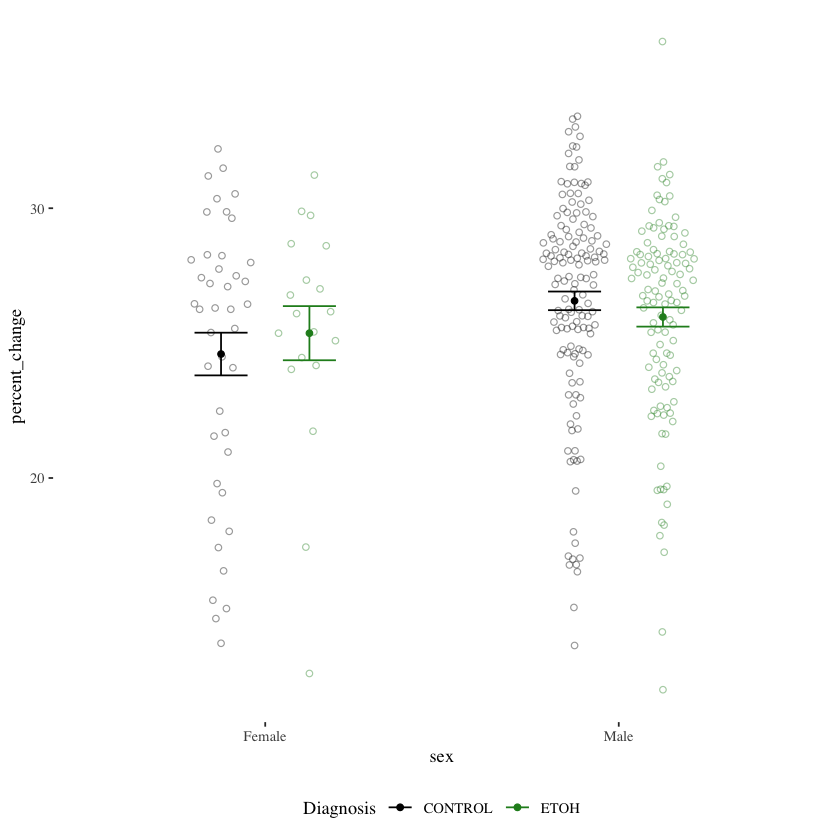

In [299]:
scatterschizpct <- ggplot(aes(sex, percent_change, col=Diagnosis), data = schizpct) +
                    geom_quasirandom(dodge.width = 0.5, shape = "circle open", alpha = 0.4) +
                    scale_colour_manual(values = c("black", "red"))
scatterschizpct1 <- scatterschizpct + stat_summary(fun.data=mean_cl_normal, geom="errorbar", width = 0.3, fun.args = list(mult=1),
                           position = position_dodge(width = 0.5)) +
                            stat_summary(fun.y=mean, geom="point", position=position_dodge(width=0.5)) +
                            theme_tufte() + 
                            theme(legend.position = "bottom")
scatterschizpct1
scatteretohpct <- ggplot(aes(sex, percent_change, col=Diagnosis), data = etohpct) +
                    geom_quasirandom(dodge.width = 0.5, shape = "circle open", alpha = 0.4) +
                    scale_colour_manual(values = c("black", "forestgreen"))
scatteretohpct1 <- scatteretohpct + stat_summary(fun.data=mean_cl_normal, geom="errorbar", width = 0.3, fun.args = list(mult=1),
                           position = position_dodge(width = 0.5)) +
                            stat_summary(fun.y=mean, geom="point", position=position_dodge(width=0.5)) +
                            theme_tufte() +
                            theme(legend.position = "bottom")
scatteretohpct1

In [664]:
#ggplot(aes(age, fresh_cerebrum_volume, col=sex), data=controltable) +
#geom_point() +
#geom_smooth(method='lm')

In [662]:
#summary(Volume_V1$Fresh_LeftCerebrum_Tissue_Volume)
#ggplot(aes(age, Fresh_LeftCerebrum_Tissue_Volume, col=GROUP), data = Volume_V1) + 
#geom_point() +
#geom_smooth(method = 'lm', se = F)

#box <- ggplot(aes(GROUP, Fresh_LeftCerebrum_Tissue_Volume, fill = GROUP), data = Volume_V1) +
#geom_violin(draw_quantiles=c(0.25, 0.5, 0.75))
#bar <- ggplot(aes(GROUP, Fresh_LeftCerebrum_Tissue_Volume, fill = GROUP), data = Volume_V1) +
#stat_summary(fun.y="mean", geom="bar")
#grid.arrange(box, bar, nrow = 2)

In [663]:
#lmvol <- lm(Fresh_LeftCerebrum_Tissue_Volume ~ GROUP, data = Volume_V1)
#summary(lmvol)

In [14]:
# better way to import, with cleansing steps
#VolumeClean <- read.csv("Volume_V1.csv", header=TRUE, row.names = "HU_NUM", na.strings=c("","NA"))
#next steps are to eliminate unneeded dimensions in the dataset and to create row subsets based on group diagnosis.

## VII. Conclusions

#### Question 1: What factors explain most of the variation in brain tissue volume in control subjects?
## *Answer: Sex, race, height, and age.*

#### Question 2: Which psychiatric diagnostic groups exhibit altered brain tissue volumes from control subjects?
## *Answer: Subjects with schizophrenia and alcohol use disorders.*

#### Question 3: Is the effect of schizophrenia on brain tissue volume mediated by comorbid alcohol use disorders?
## *Answer: Probably not?*

## VII. Future Direction

-Run the mediation model (etoh and schiz) with LDA rather than logistic regression.
-Evaluate whether alcohol use influences brain tissue volume in the major depression disorder group.
-Further evaluate the random variable of human subject number.

Useful help for creating this document:

https://www.r-bloggers.com/useful-dplyr-functions-wexamples/ #using dlpyr